<a href="https://www.kaggle.com/code/harshkumar18999/malware-detection-using-machine-learning?scriptVersionId=233317448" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Problem Statement**

In recent years, the malware industry has become a well organized market involving large amounts of money. Well funded, multi-player syndicates invest heavily in technologies and capabilities built to evade traditional protection, requiring anti-malware vendors to develop counter mechanisms for finding and deactivating them. In the meantime, they inflict real financial and emotional pain to users of computer systems

![dataset](https://storage.googleapis.com/kaggle-media/competitions/kaggle/4117/media/malware_classification.png)

major challenges that anti-malware faces today is the vast amounts of data and files which need to be evaluated for potential malicious intent. For example, Microsoft's real-time detection anti-malware products are present on over 160M computers worldwide and inspect over 700M computers monthly. This generates tens of millions of daily data points to be analyzed as potential malware. One of the main reasons for these high volumes of different files is the fact that, in order to evade detection, malware authors introduce polymorphism to the malicious components. This means that malicious files belonging to the same malware "family", with the same forms of malicious behavior, are constantly modified and/or obfuscated using various tactics, such that they look like many different files.

In order to be effective in analyzing and classifying such large amounts of files, we need to be able to group them into groups and identify their respective families. In addition, such grouping criteria may be applied to new files encountered on computers in order to detect them as malicious and of a certain family.

In [1]:
!pip install bayesian-optimization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv('/kaggle/input/malwaremicrosoftbig/data.csv')

In [5]:
data.head()

,asm_commands_add,asm_commands_call,asm_commands_cdq,asm_commands_cld,asm_commands_cli,asm_commands_cmc,asm_commands_cmp,asm_commands_cwd,asm_commands_daa,asm_commands_dd,asm_commands_dec,asm_commands_dw,asm_commands_endp,asm_commands_faddp,asm_commands_fchs,asm_commands_fdiv,asm_commands_fdivr,asm_commands_fistp,asm_commands_fld,asm_commands_fstp,asm_commands_fword,asm_commands_fxch,asm_commands_imul,asm_commands_in,asm_commands_inc,asm_commands_ins,asm_commands_jb,asm_commands_je,asm_commands_jg,asm_commands_jl,asm_commands_jmp,asm_commands_jnb,asm_commands_jno,asm_commands_jo,asm_commands_jz,asm_commands_lea,asm_commands_mov,asm_commands_mul,asm_commands_not,asm_commands_or,asm_commands_out,asm_commands_outs,asm_commands_pop,asm_commands_push,asm_commands_rcl,asm_commands_rcr,asm_commands_rep,asm_commands_ret,asm_commands_rol,asm_commands_ror,asm_commands_sal,asm_commands_sar,asm_commands_sbb,asm_commands_scas,asm_commands_shl,asm_commands_shr,asm_commands_sidt,asm_commands_stc,asm_commands_std,asm_commands_sti,asm_commands_stos,asm_commands_sub,asm_commands_test,asm_commands_wait,asm_commands_xchg,asm_commands_xor,line_count_asm,size_asm,Class
0,436,646.0,0.0,10.0,9.0,0.0,228.0,0.0,56.0,89930,114.0,1877.0,93.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,2397,55.0,48.0,136.0,32.0,0.0,1.0,48.0,23.0,0.0,0.0,54.0,248.0,2246.0,48.0,80.0,2969,6.0,0.0,201.0,579.0,4.0,33.0,32.0,262.0,9.0,245.0,8.0,4.0,3.0,0.0,23.0,14.0,0.0,5.0,350.0,1.0,0.0,892.0,53.0,10.0,0.0,162.0,118529,6874624,2
1,469,262.0,0.0,4.0,1.0,4.0,185.0,4.0,20.0,3464,44.0,1828.0,46.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,3.0,0.0,5.0,185,8.0,141.0,16.0,4.0,9.0,12.0,72.0,15.0,0.0,1.0,79.0,96.0,2562.0,5.0,4.0,2179,3.0,0.0,50.0,404.0,2.0,0.0,3.0,49.0,6.0,6.0,0.0,20.0,5.0,5.0,32.0,0.0,0.0,2.0,64.0,3.0,7.0,846.0,8.0,0.0,9.0,19.0,7937,460288,8
2,1587,1828.0,0.0,0.0,31.0,0.0,689.0,0.0,904.0,24833,1030.0,4519.0,159.0,0.0,0.0,8.0,3.0,0.0,0.0,0.0,0.0,0.0,82.0,1234,7.0,63.0,2.0,57.0,353.0,317.0,733.0,0.0,0.0,8.0,557.0,336.0,5307.0,10.0,92.0,7125,65.0,0.0,546.0,3208.0,4.0,0.0,3.0,318.0,23.0,8.0,4.0,25.0,0.0,0.0,161.0,2.0,0.0,8.0,317.0,1.0,0.0,4005.0,680.0,44.0,0.0,418.0,90625,5256192,9
3,213,227.0,0.0,0.0,3.0,0.0,127.0,0.0,132.0,71979,613.0,495.0,20.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,253,4.0,16.0,7.0,14.0,0.0,44.0,1.0,0.0,0.0,0.0,44.0,231.0,161.0,5.0,12.0,1064,3.0,0.0,72.0,442.0,2.0,3.0,3.0,58.0,9.0,0.0,0.0,0.0,19.0,0.0,7.0,0.0,0.0,0.0,102.0,0.0,0.0,437.0,78.0,0.0,0.0,199.0,83201,4825600,9
4,36,76.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,112,10.0,139.0,14.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113,8.0,2.0,1.0,5.0,0.0,1.0,12.0,5.0,0.0,2.0,13.0,39.0,92.0,0.0,4.0,498,1.0,0.0,19.0,82.0,0.0,0.0,3.0,22.0,3.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,180.0,2.0,3.0,82.0,16.0,0.0,0.0,18.0,12289,712704,1


In [6]:
data['Class'].value_counts()

Class
3    2942
2    2478
1    1541
8    1228
9    1013
6     751
4     475
7     398
5      42
Name: count, dtype: int64

In [7]:
data.describe()

,asm_commands_add,asm_commands_call,asm_commands_cdq,asm_commands_cld,asm_commands_cli,asm_commands_cmc,asm_commands_cmp,asm_commands_cwd,asm_commands_daa,asm_commands_dd,asm_commands_dec,asm_commands_dw,asm_commands_endp,asm_commands_faddp,asm_commands_fchs,asm_commands_fdiv,asm_commands_fdivr,asm_commands_fistp,asm_commands_fld,asm_commands_fstp,asm_commands_fword,asm_commands_fxch,asm_commands_imul,asm_commands_in,asm_commands_inc,asm_commands_ins,asm_commands_jb,asm_commands_je,asm_commands_jg,asm_commands_jl,asm_commands_jmp,asm_commands_jnb,asm_commands_jno,asm_commands_jo,asm_commands_jz,asm_commands_lea,asm_commands_mov,asm_commands_mul,asm_commands_not,asm_commands_or,asm_commands_out,asm_commands_outs,asm_commands_pop,asm_commands_push,asm_commands_rcl,asm_commands_rcr,asm_commands_rep,asm_commands_ret,asm_commands_rol,asm_commands_ror,asm_commands_sal,asm_commands_sar,asm_commands_sbb,asm_commands_scas,asm_commands_shl,asm_commands_shr,asm_commands_sidt,asm_commands_stc,asm_commands_std,asm_commands_sti,asm_commands_stos,asm_commands_sub,asm_commands_test,asm_commands_wait,asm_commands_xchg,asm_commands_xor,line_count_asm,size_asm,Class
count,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.00000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,1.086800e+04,10868.000000
mean,724.463839,958.675377,10.774384,200.203165,16.794258,1.900074,480.152742,1.411115,221.034321,16995.688167,369.564961,1633.513434,198.245031,2.157527,1.209422,4.493007,1.352595,0.570114,37.529352,34.353699,3.860784,10.727641,539.827107,1204.645841,126.269691,44.647865,59.585388,66.664336,48.977273,76.548951,320.707122,23.668384,0.650166,6.436143,342.629739,490.867409,4219.716599,571.416820,45.057692,3083.71163,23.585848,1.643633,583.450221,1770.318734,4.966507,4.681542,32.683566,291.925285,38.260029,44.713379,8.023371,29.708042,26.705926,2.297111,55.783033,42.534413,0.135720,9.154490,606.171237,6.146669,15.102135,2156.040302,330.867777,6.230861,71.709698,493.072874,80667.184026,4.678640e+06,4.017851
std,1568.276158,2891.049563,39.071261,1567.778035,184.439789,35.070993,1384.428550,13.709346,498.249596,32916.498115,925.718189,3564.943590,639.043350,24.660705,37.488367,17.953880,7.803282,4.419558,406.137445,342.236969,30.180035,77.355211,3312.233800,5642.173581,532.058489,241.102036,202.217080,583.636514,161.295030,254.390063,930.100027,90.314812,6.919418,67.098634,1159.707581,1629.269958,11617.856741,3417.630997,331.874575,7670.13986,138.488228,16.136469,1583.790867,5343.420273,23.760379,29.514246,127.668212,804.553479,456.772162,252.278762,143.257211,205.572251,97.614383,19.945923,400.642261,252.975663,1.450157,150.651311,3897.868465,36.775391,55.051804,6674.654957,1107.955680,17.015893,581.487035,2468.536914,64475.348289,3.739570e+06,2.684621
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

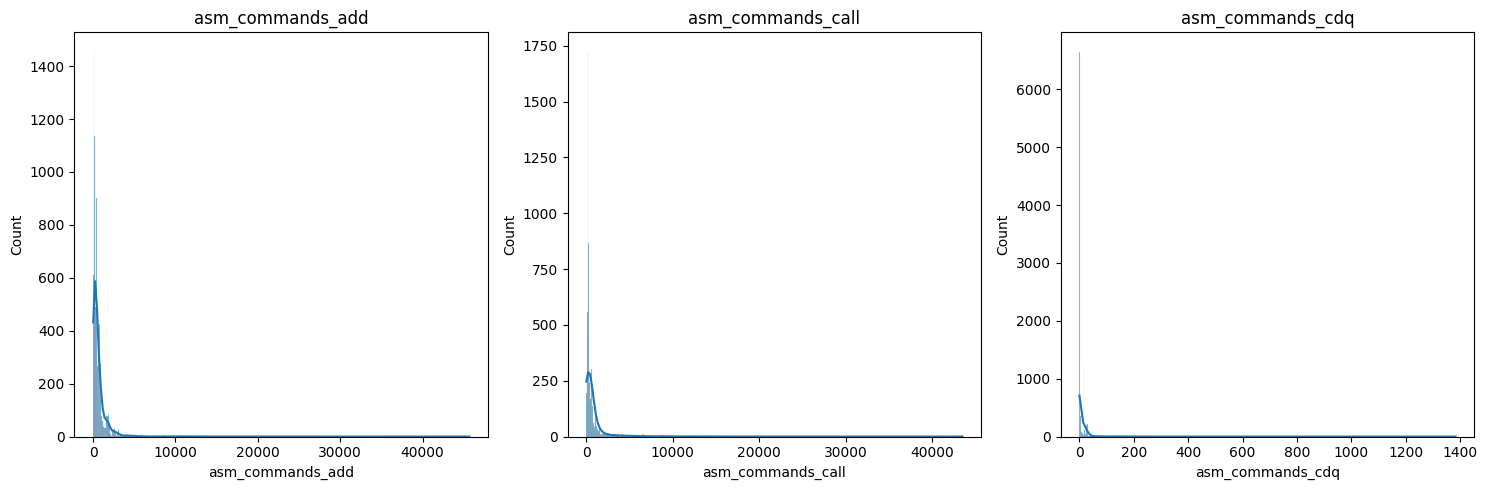

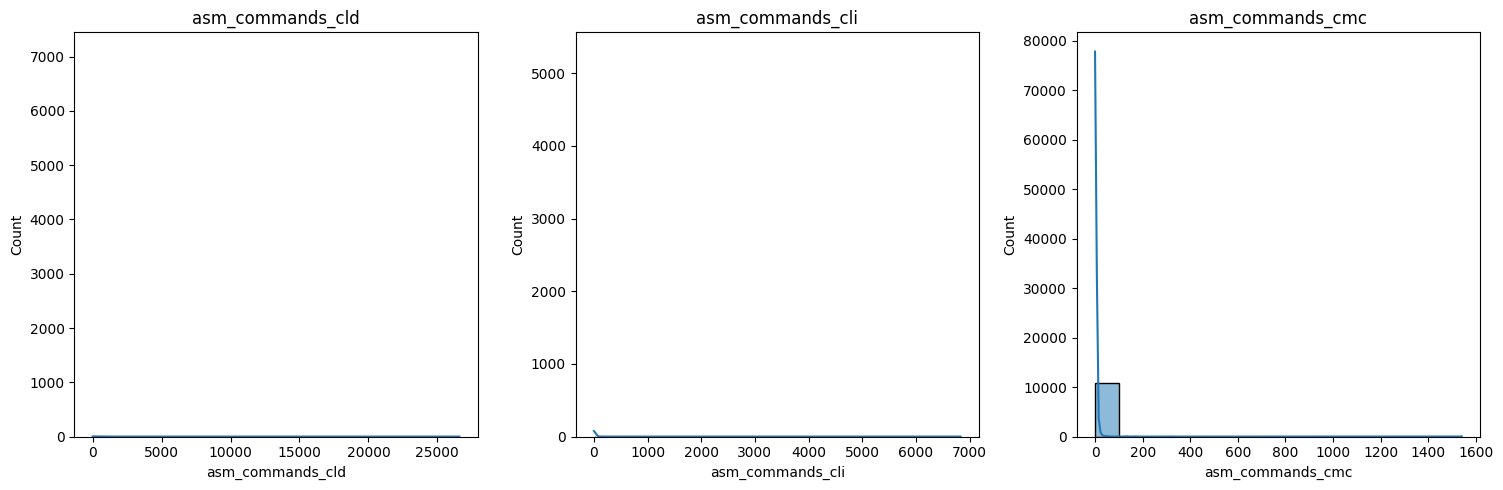

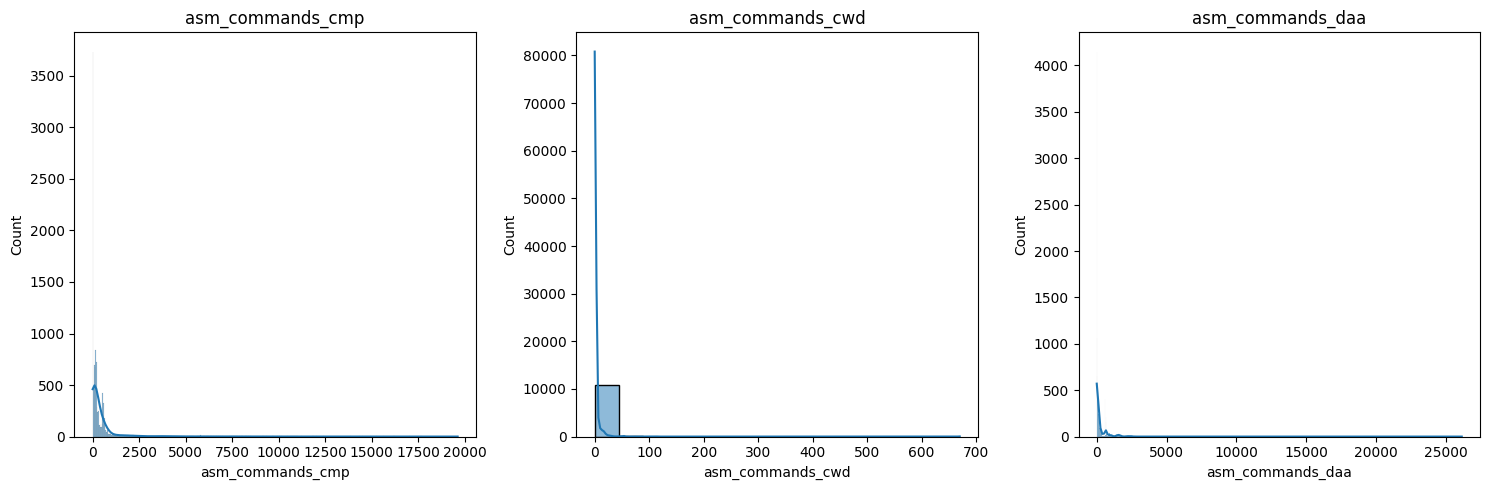

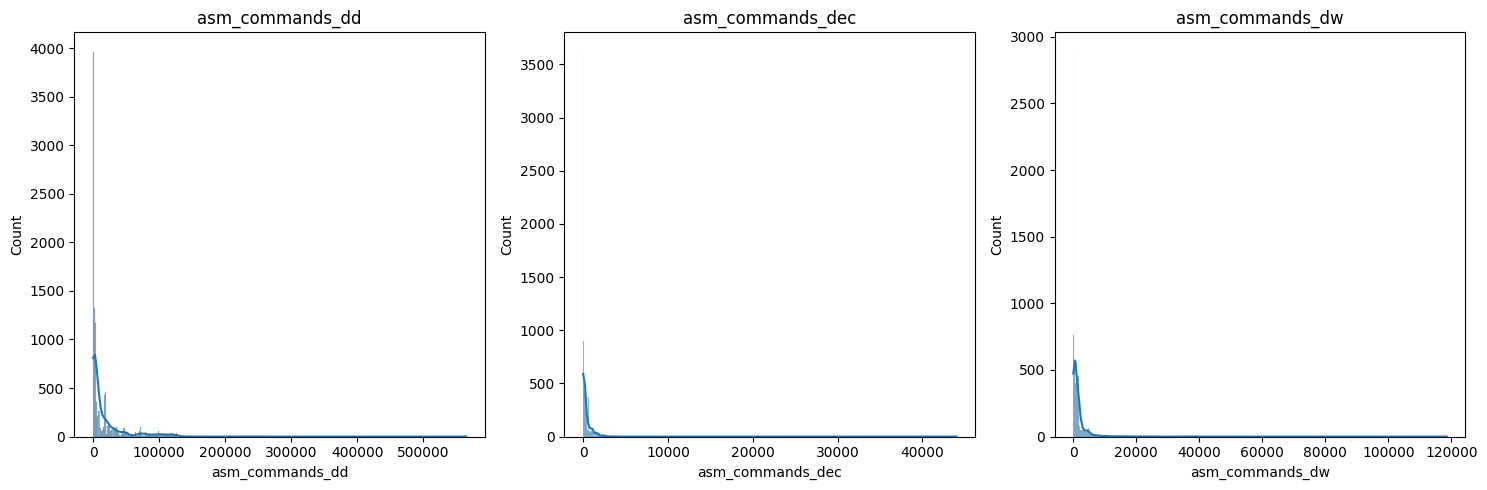

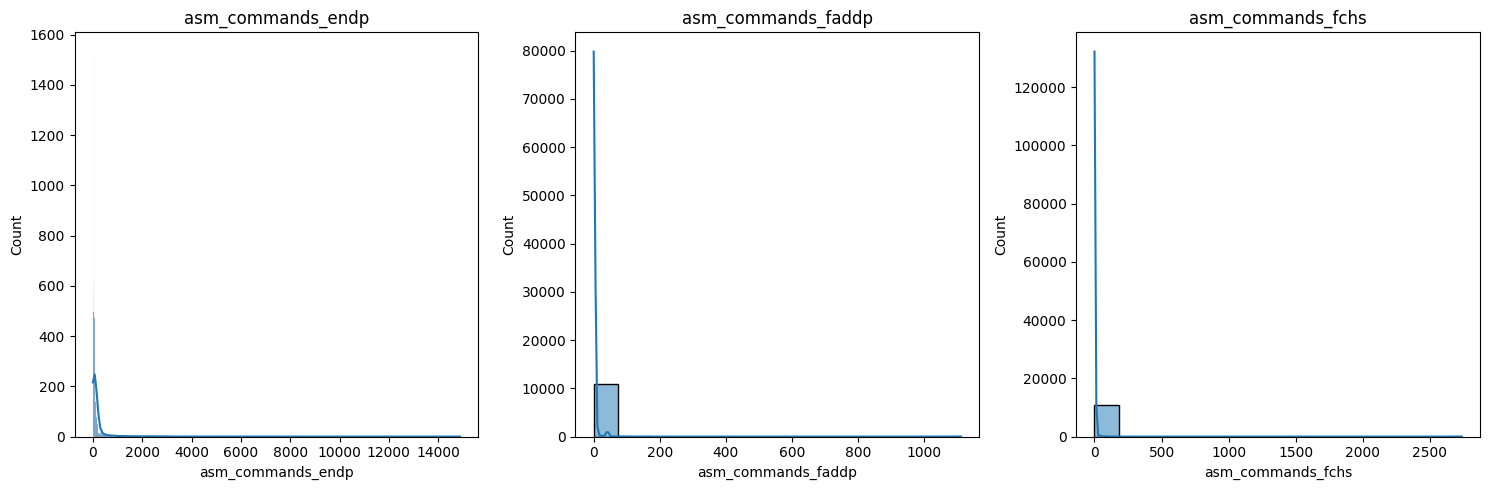

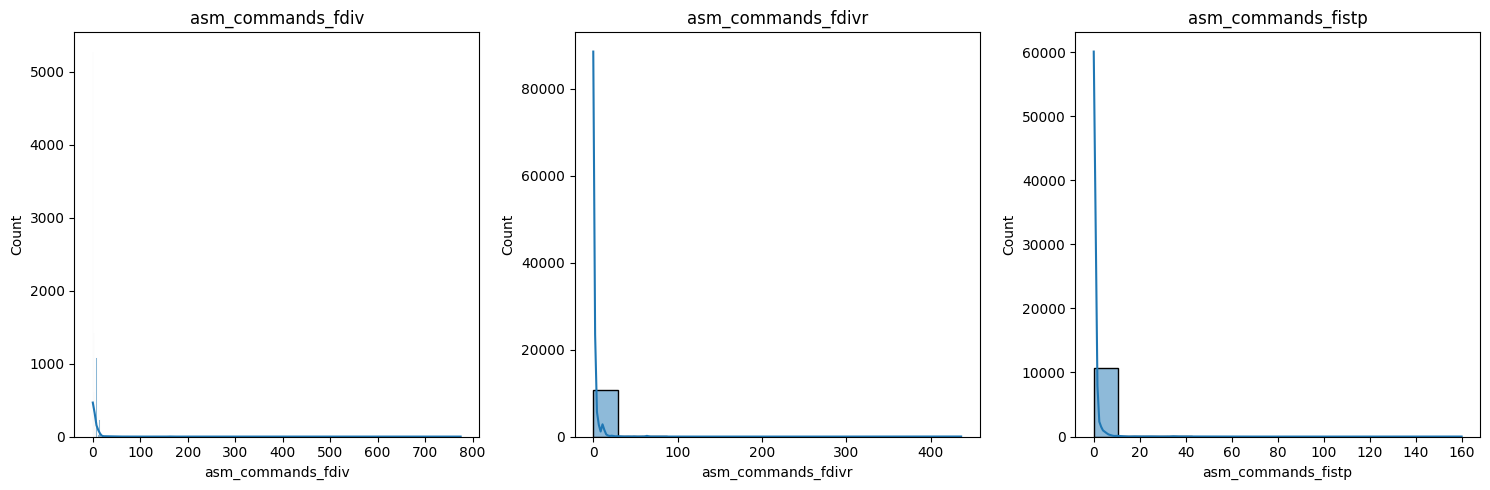

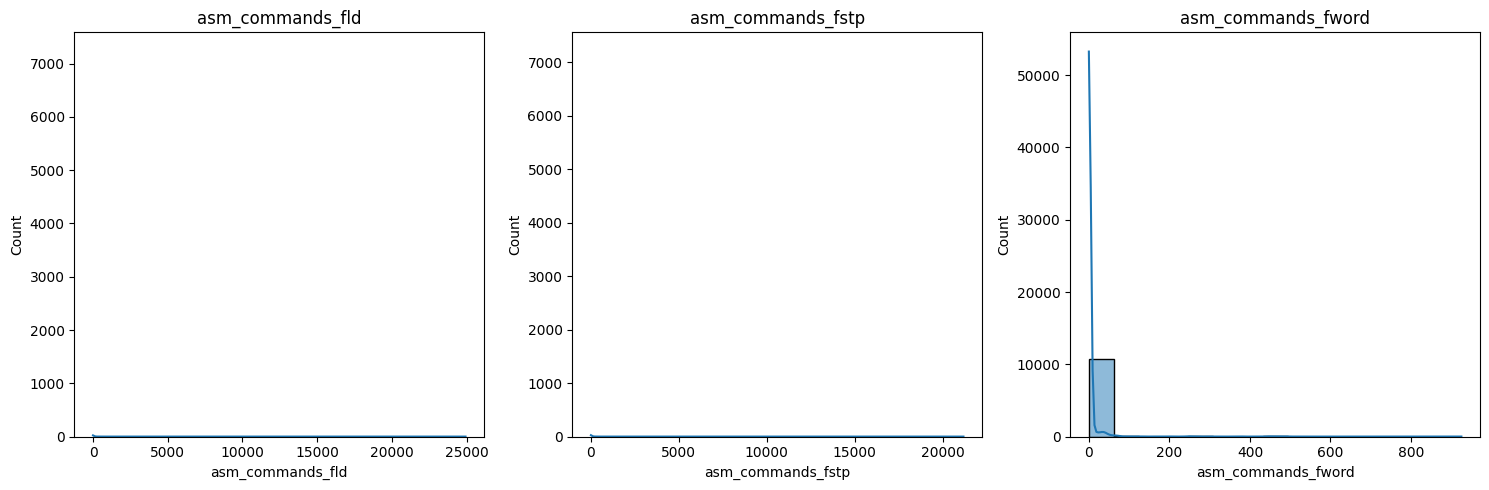

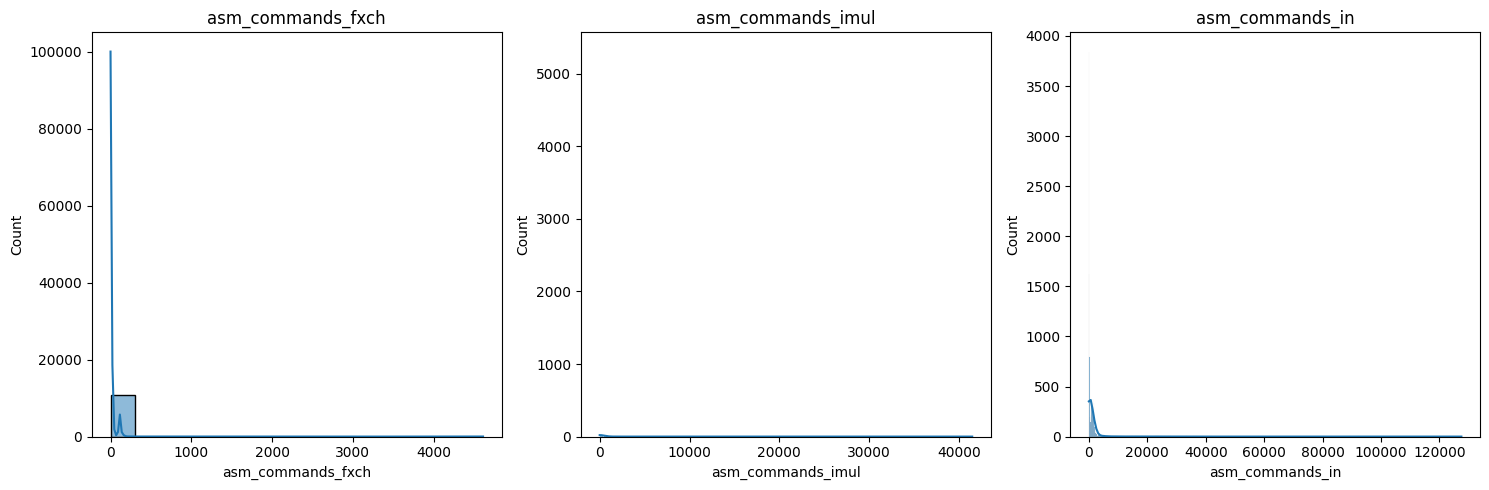

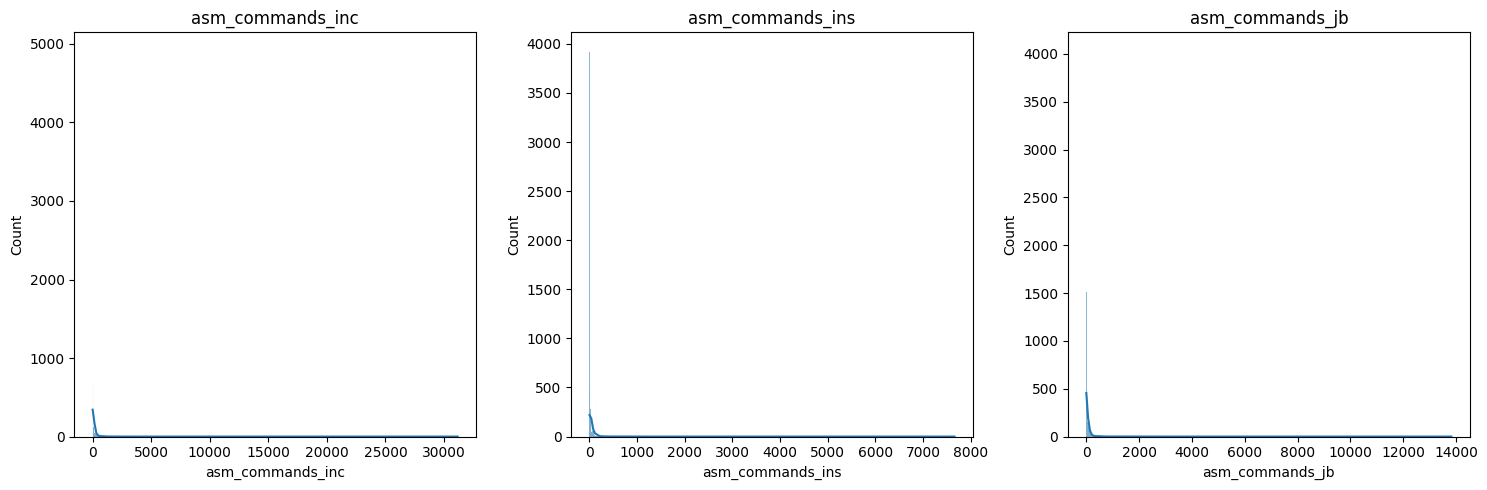

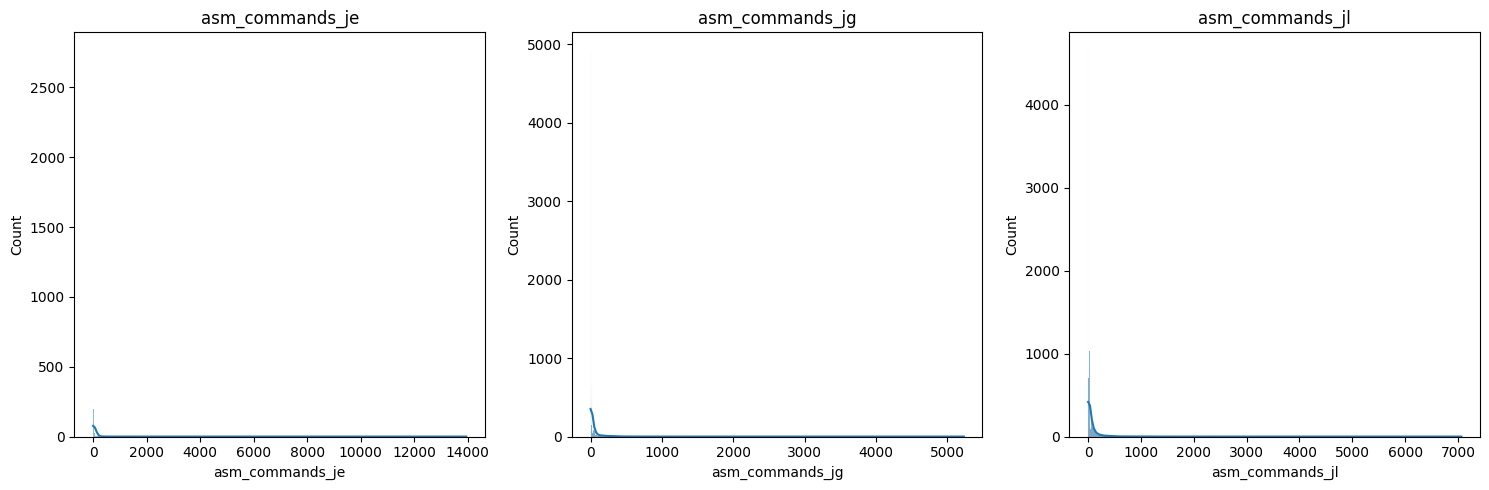

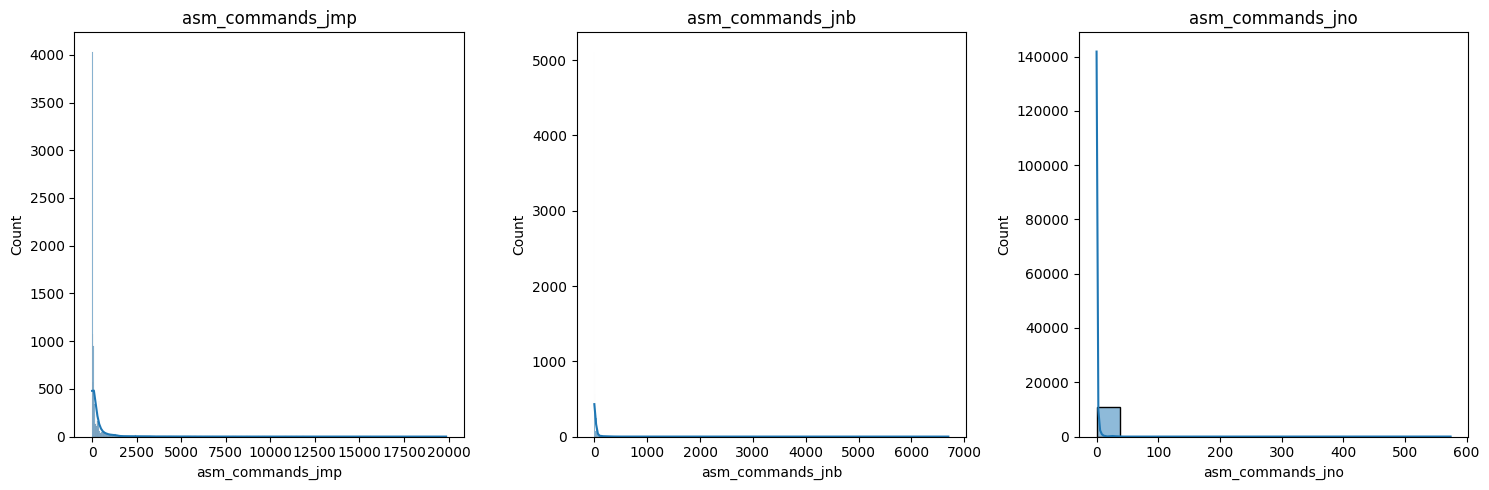

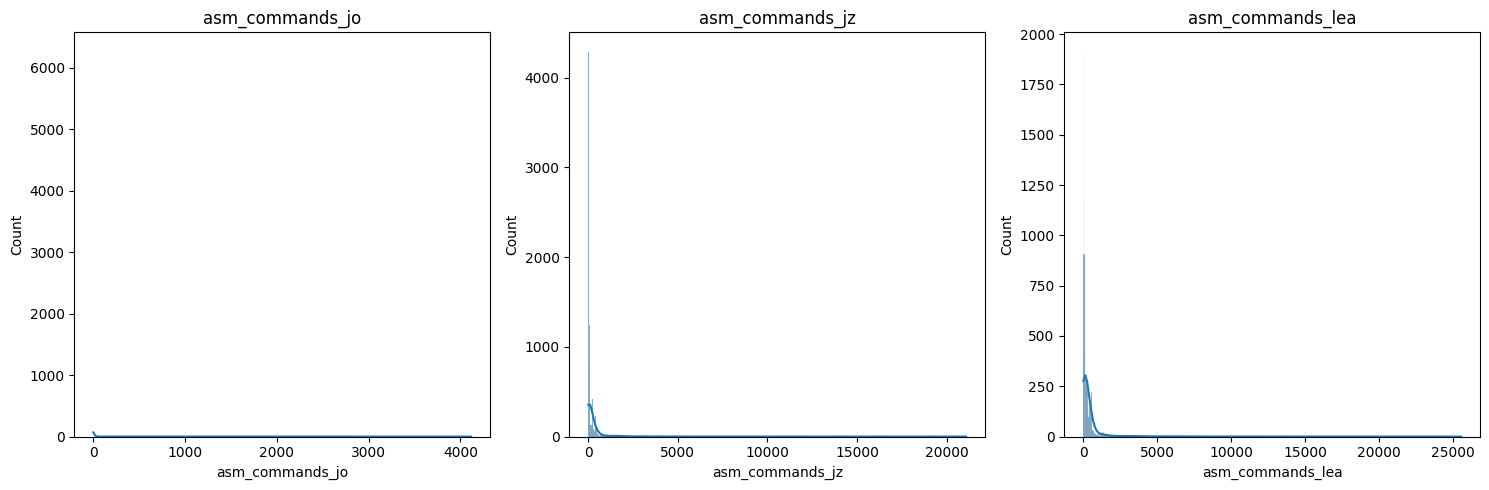

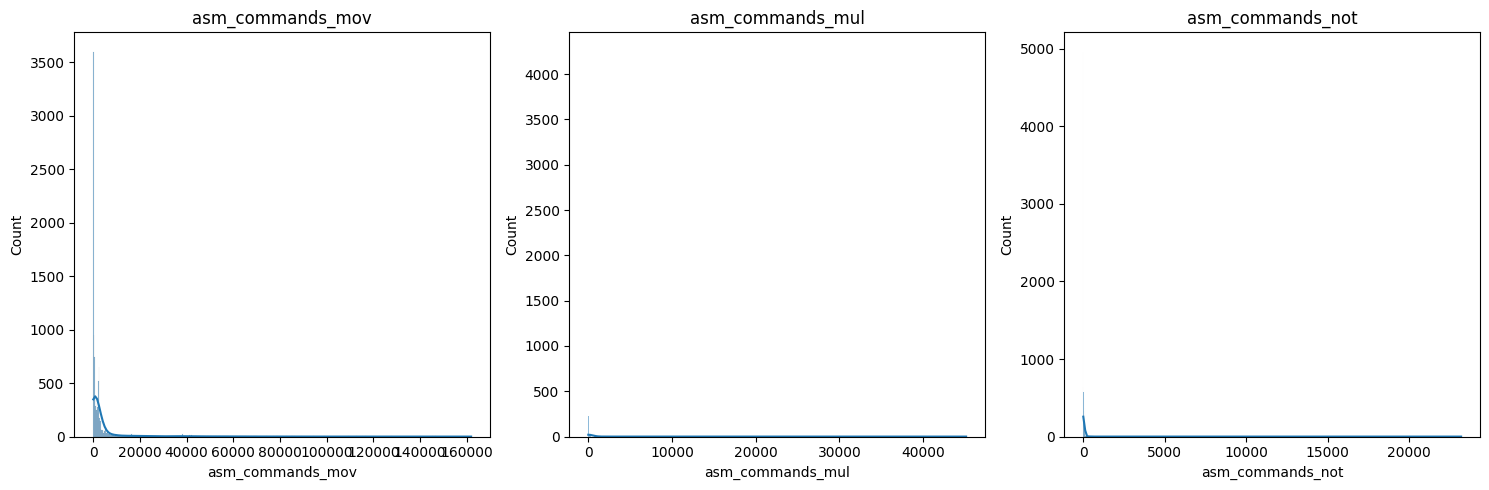

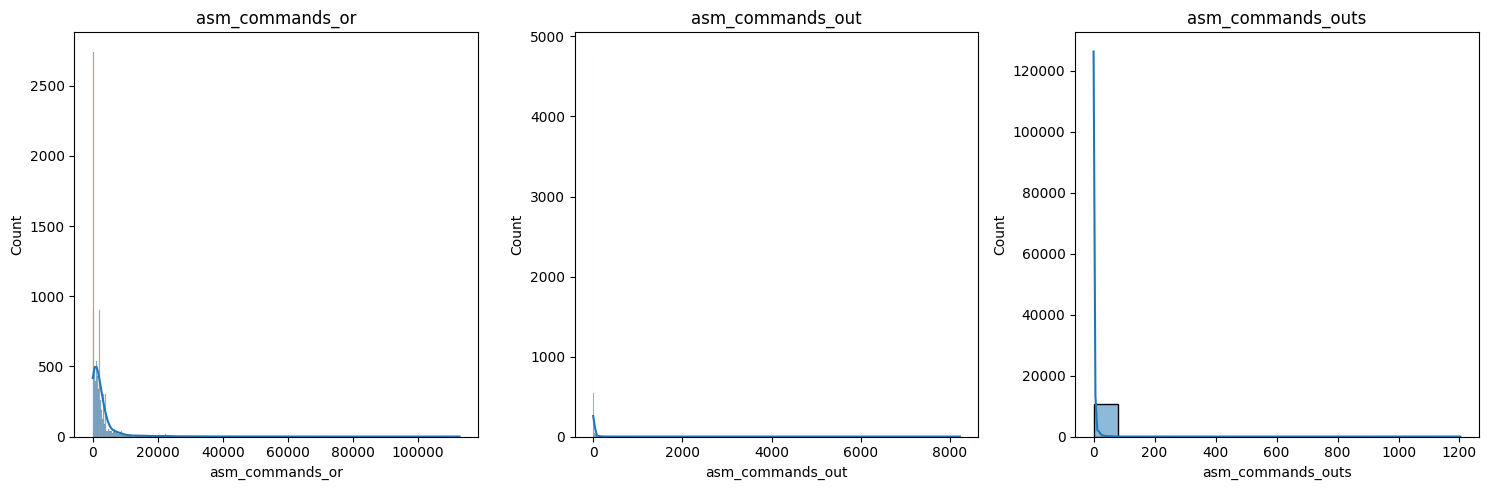

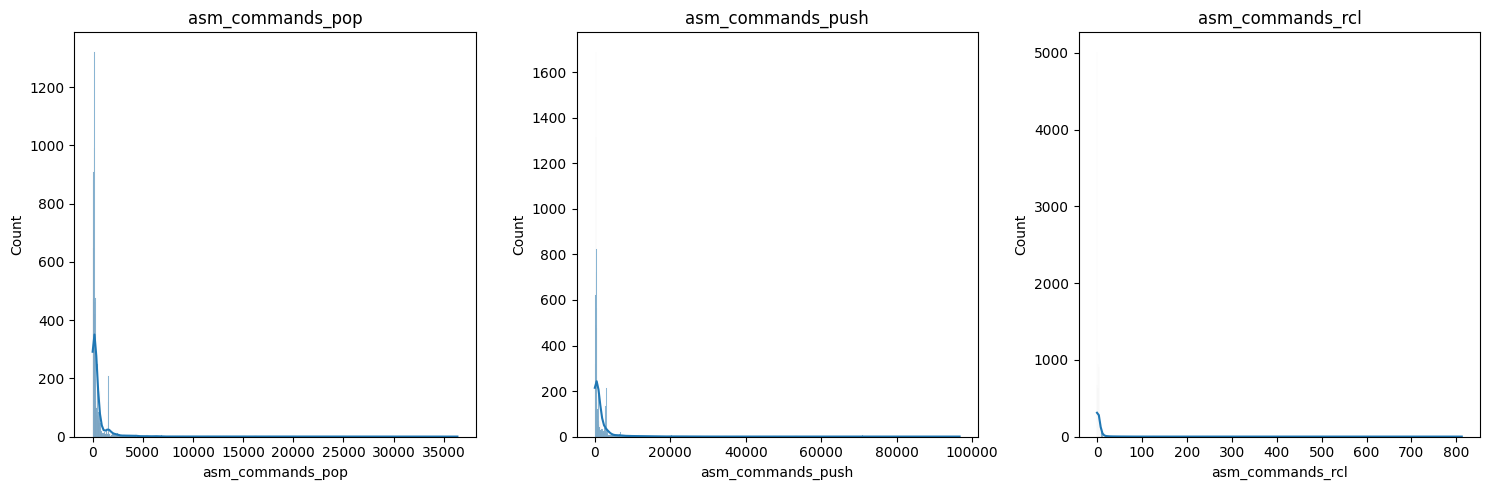

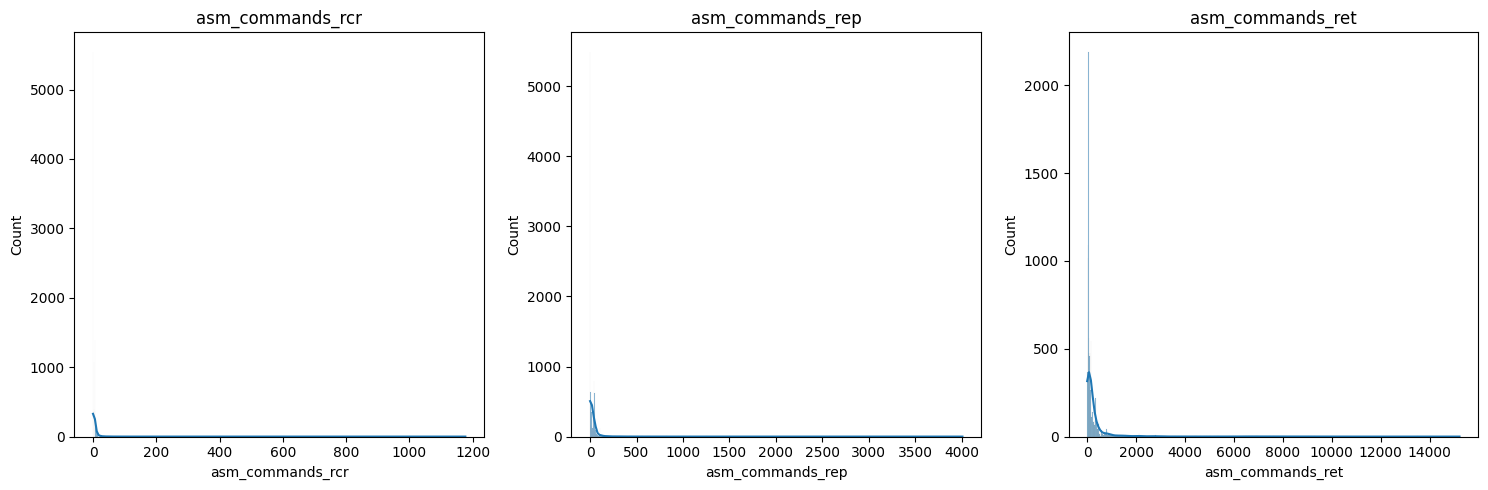

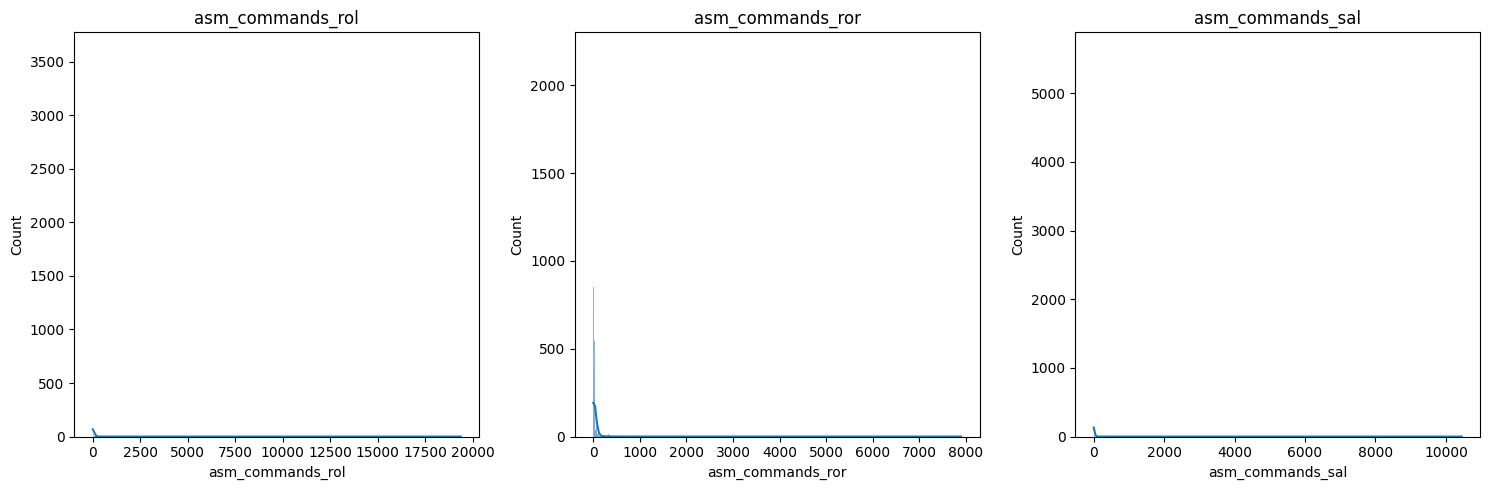

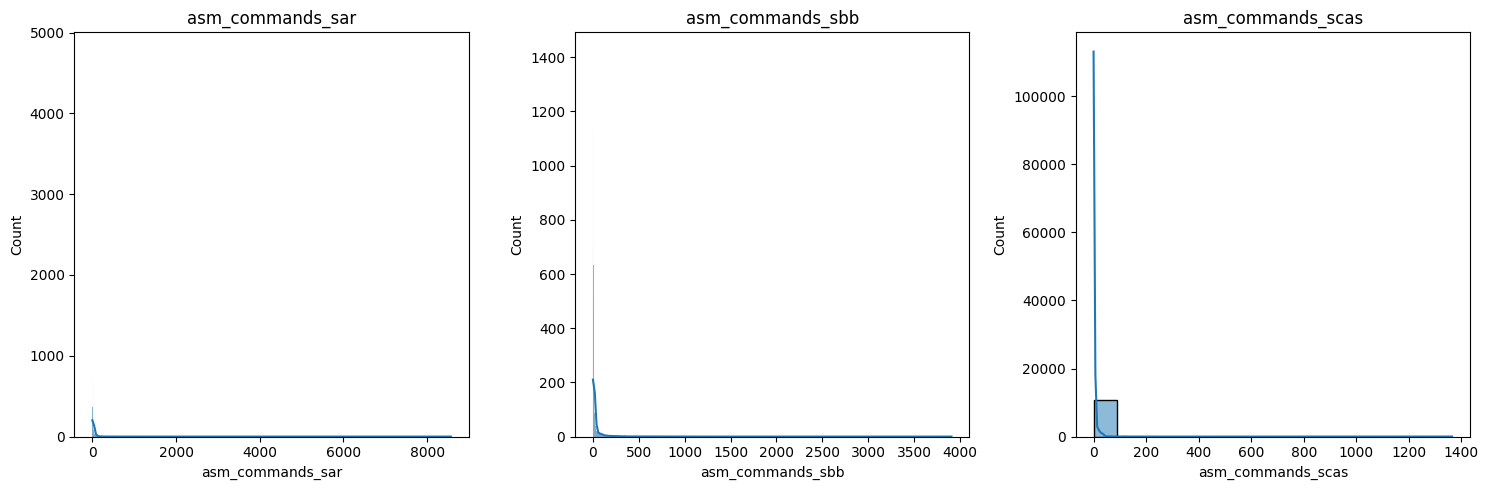

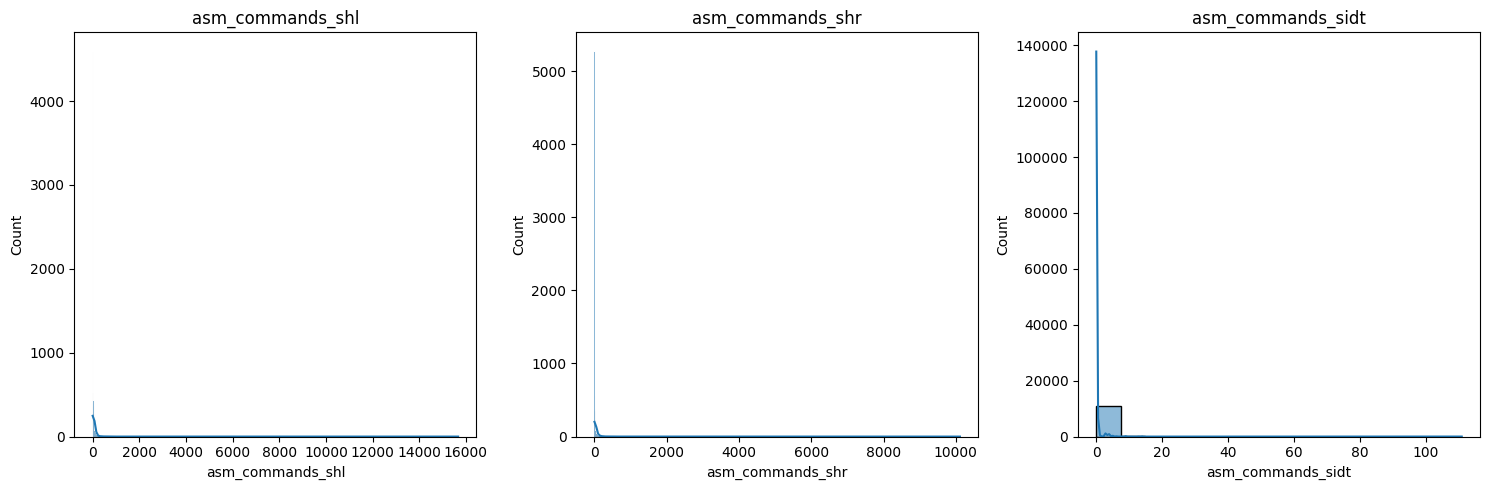

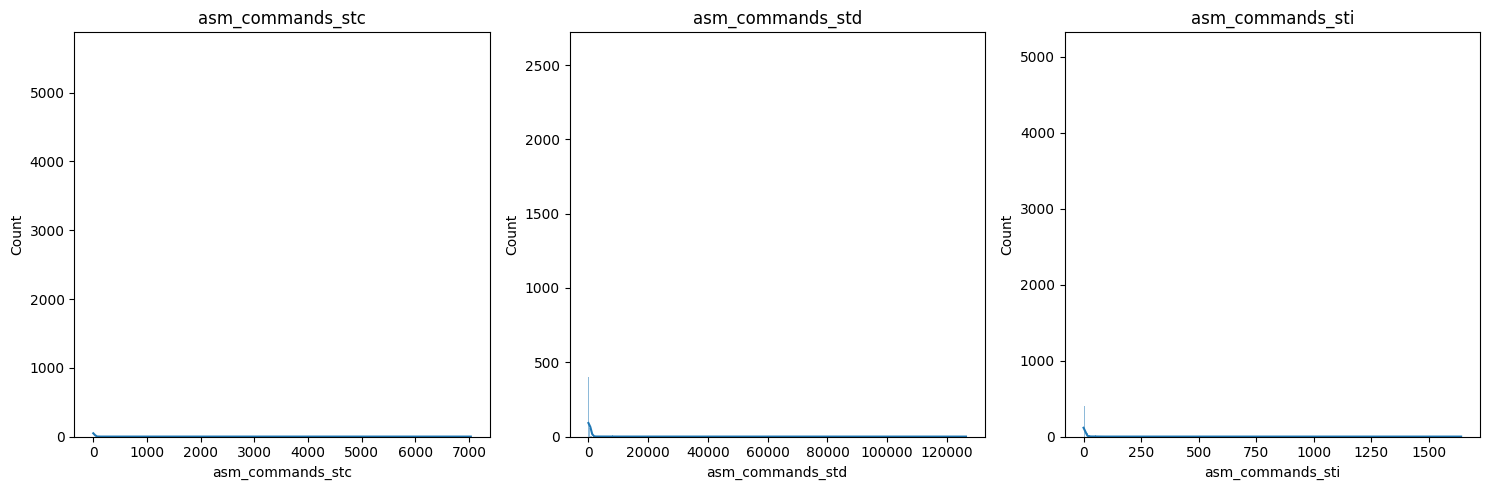

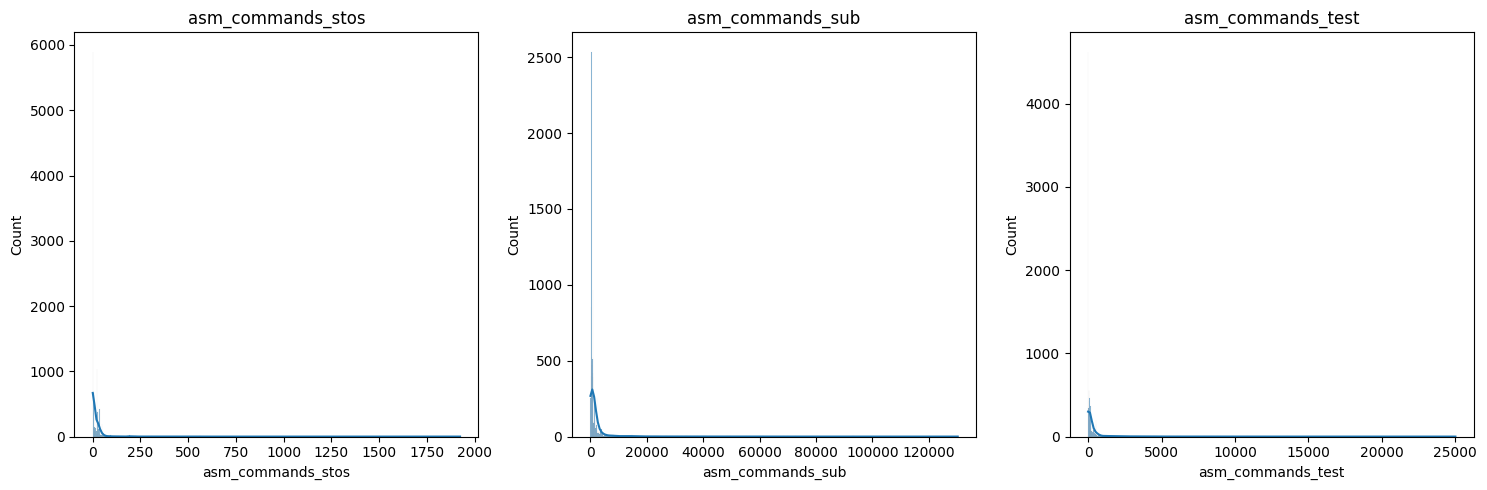

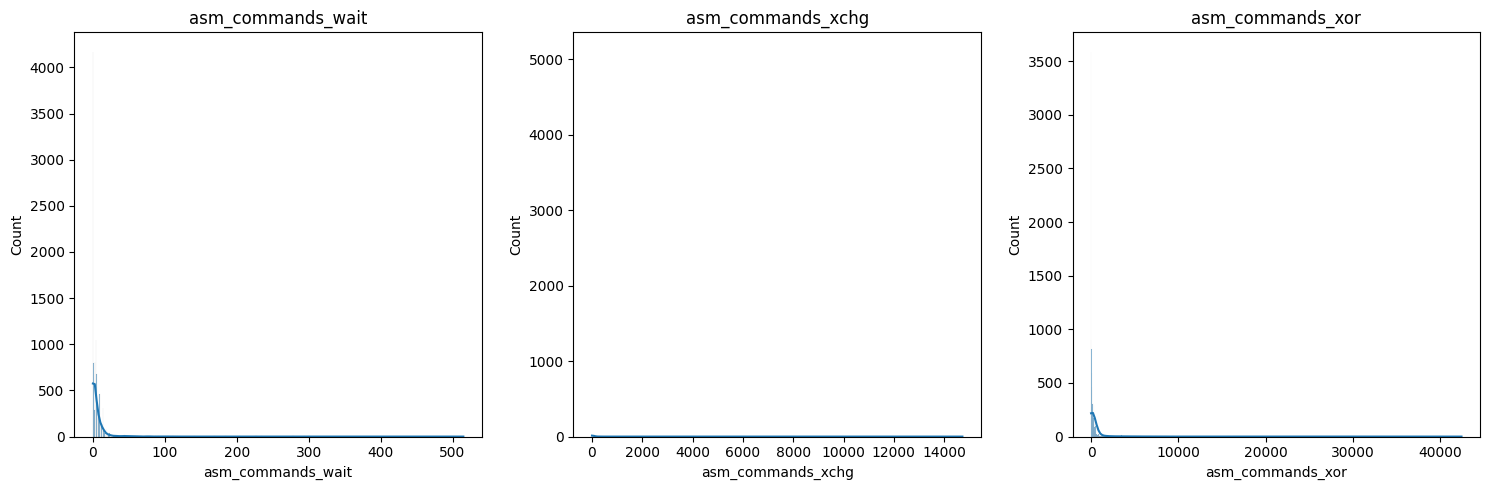

In [8]:
num = 0
for iter in range(22):
  plt.subplots(1, 3, figsize=(15, 5))
  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(data.columns[num])
    sns.histplot(x = data[data.columns[num]], kde=True)
    num += 1

  plt.tight_layout()
  plt.show()

**Insight:** Given columns are highly left skewed, now we should perform a log transformation to normalize the dataset. it is a very popular technique to normalize the data

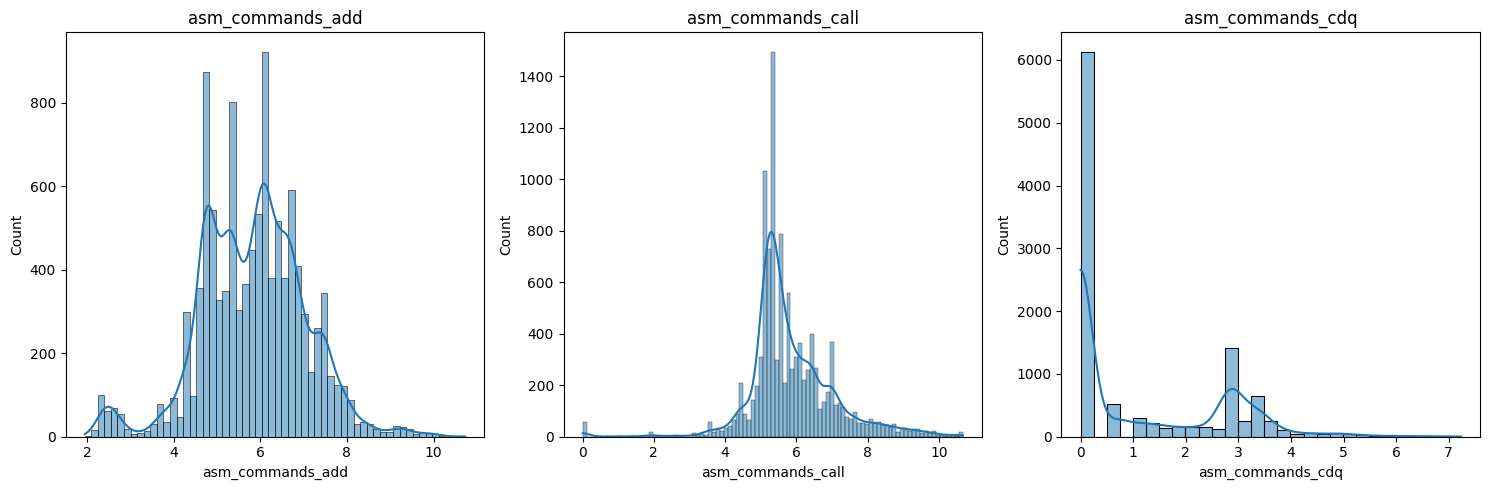

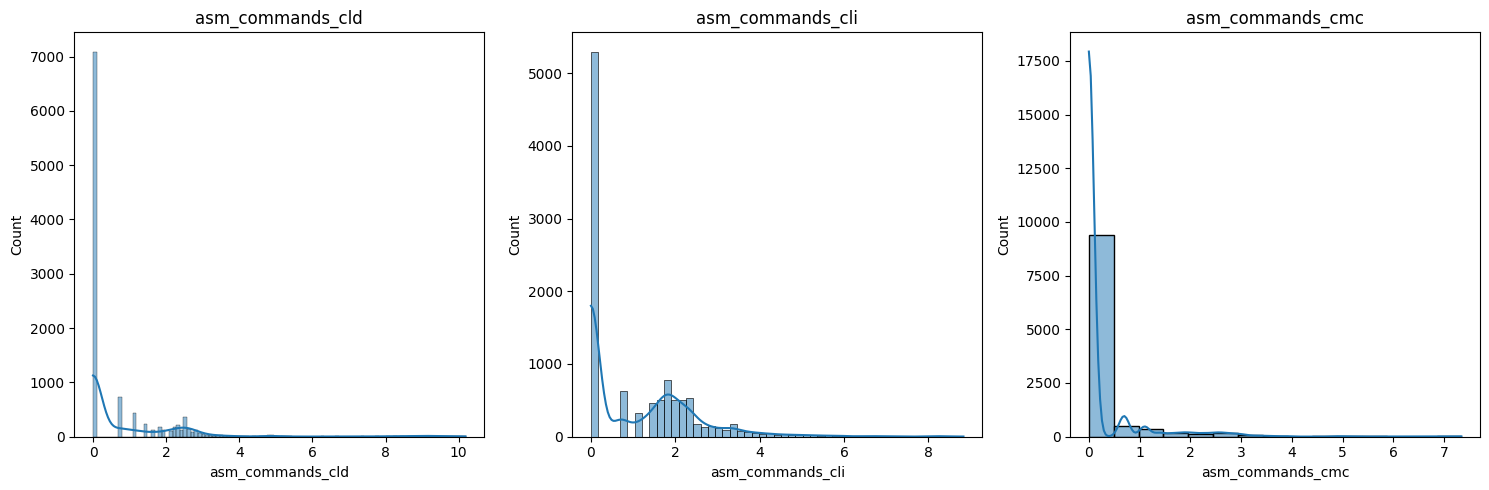

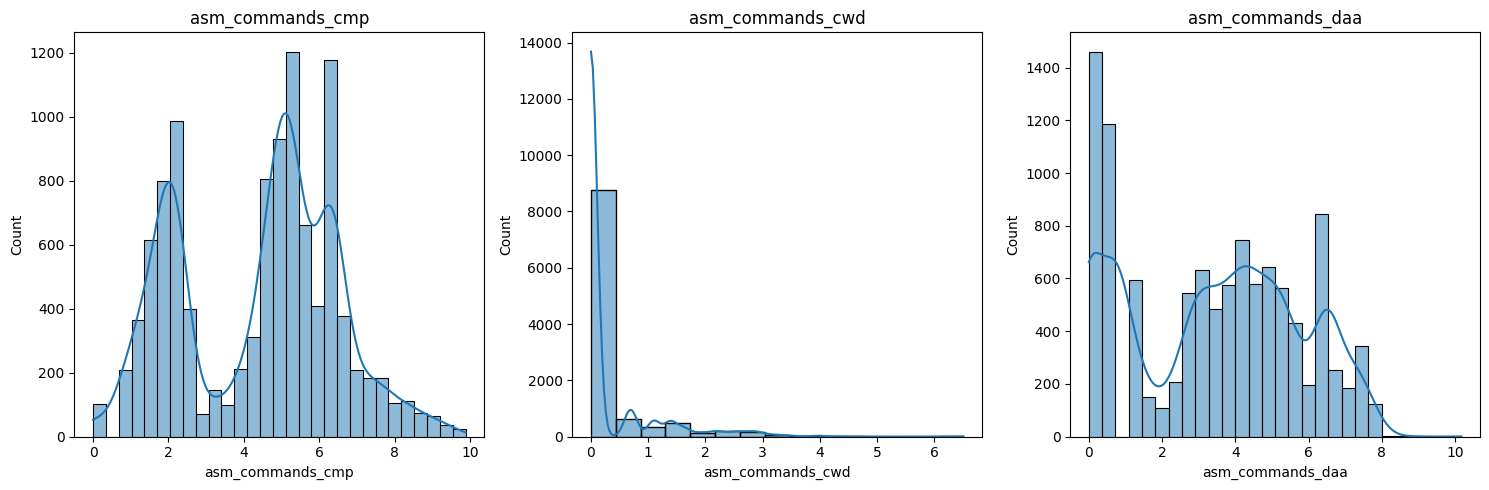

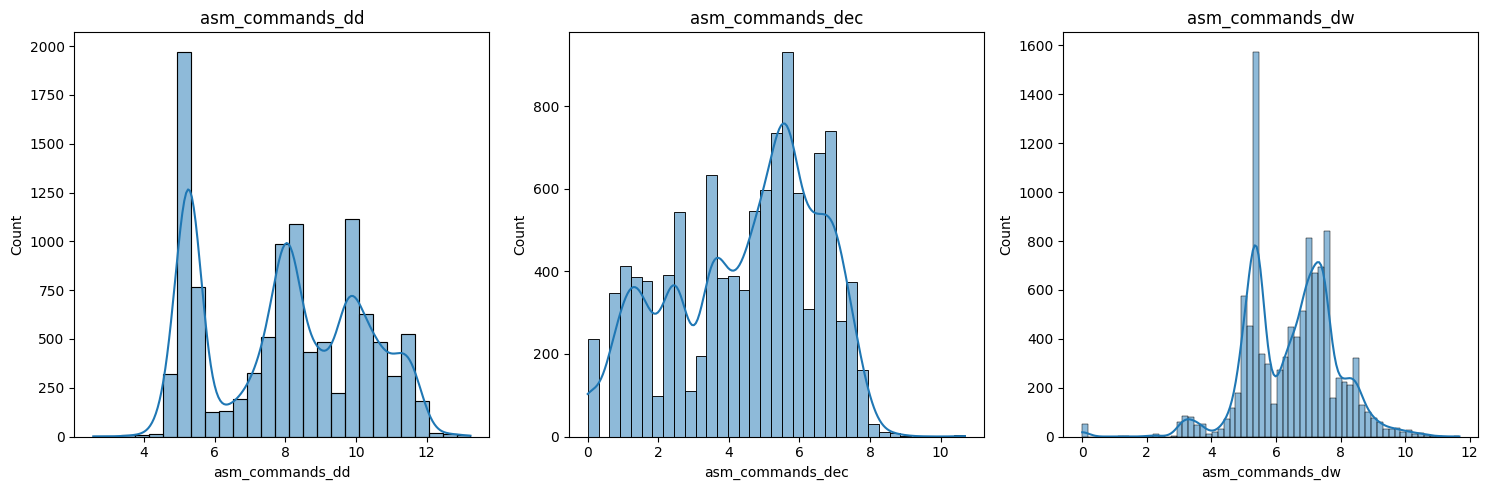

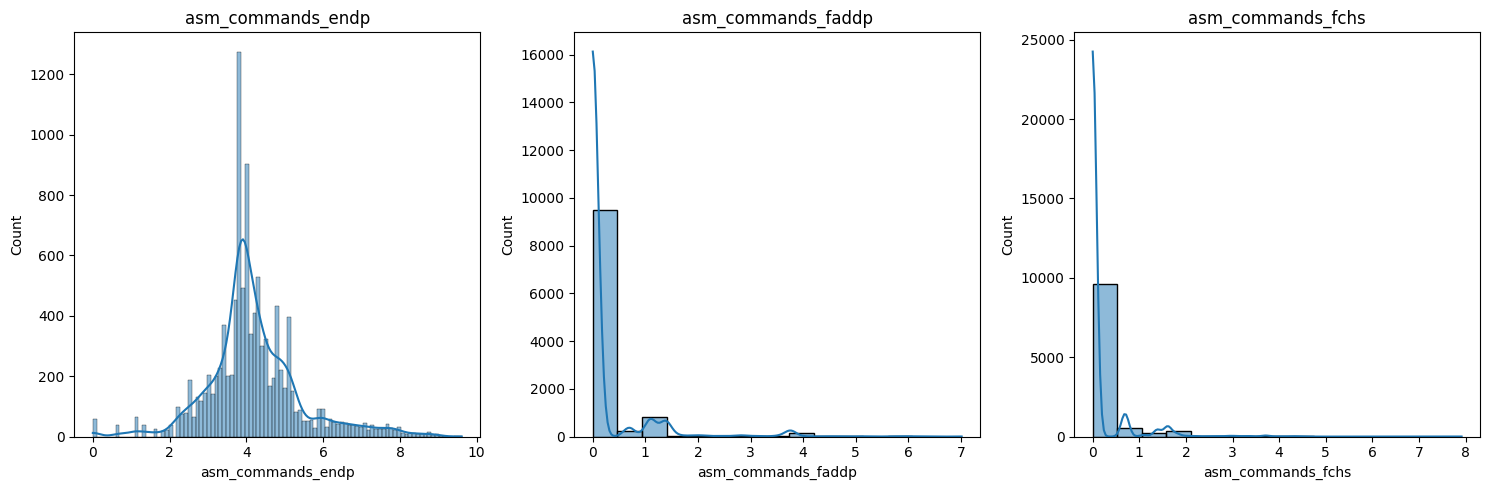

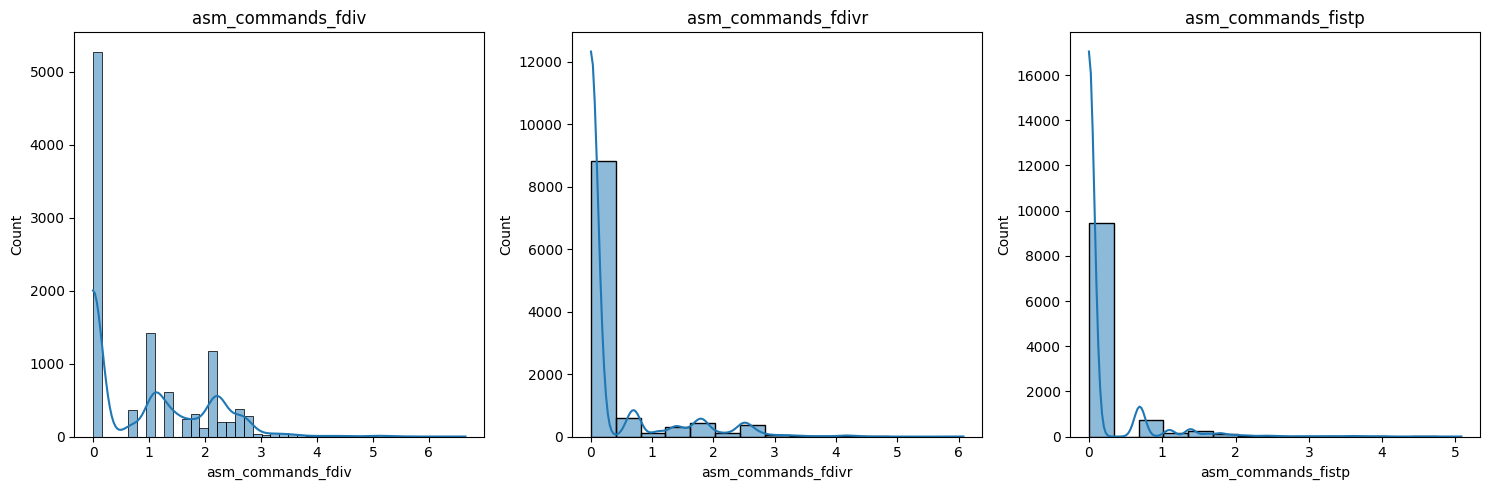

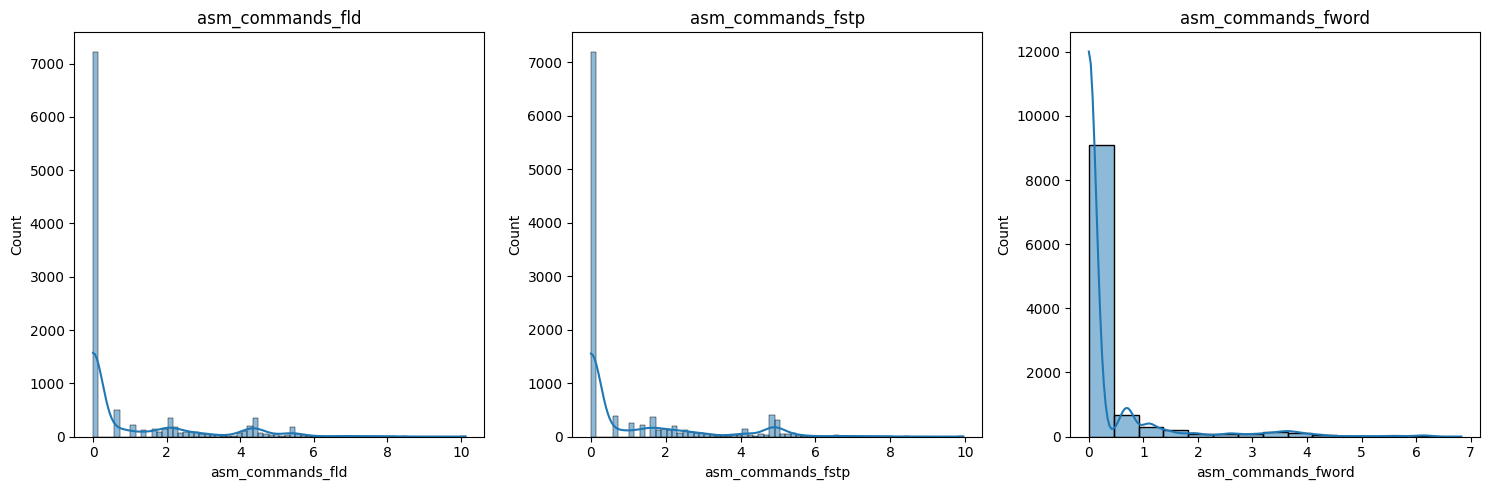

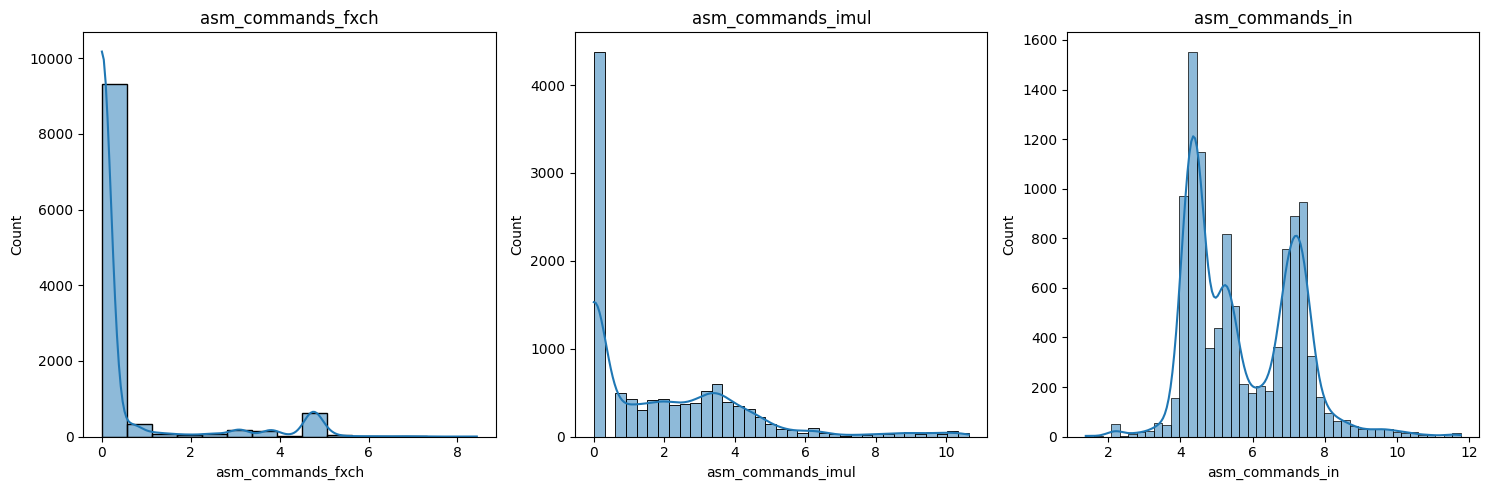

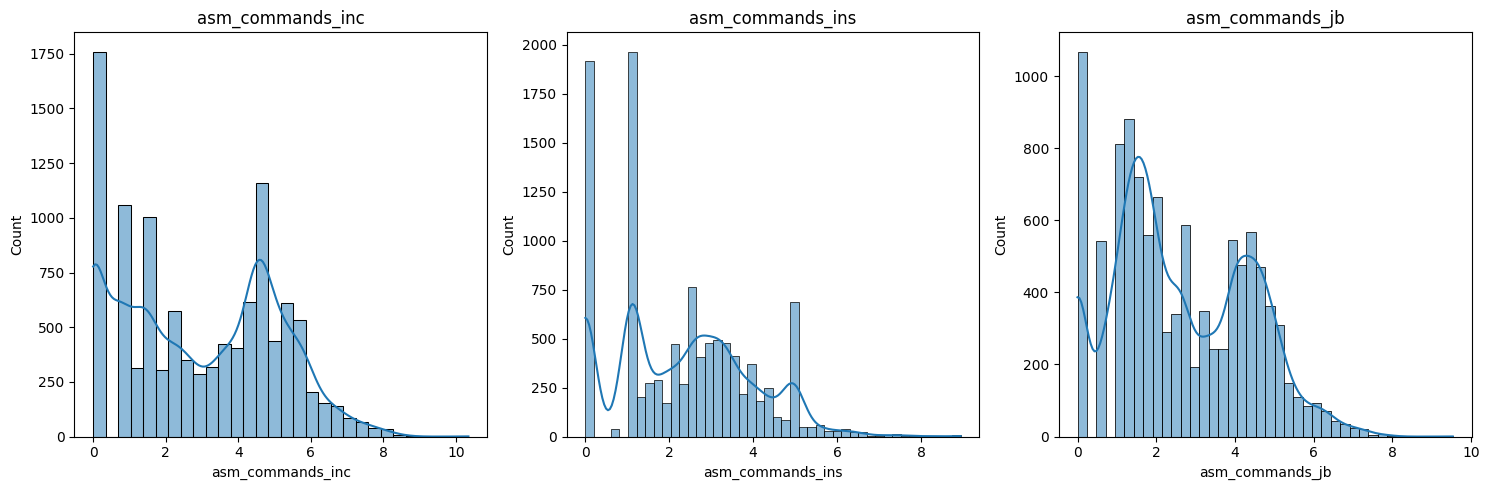

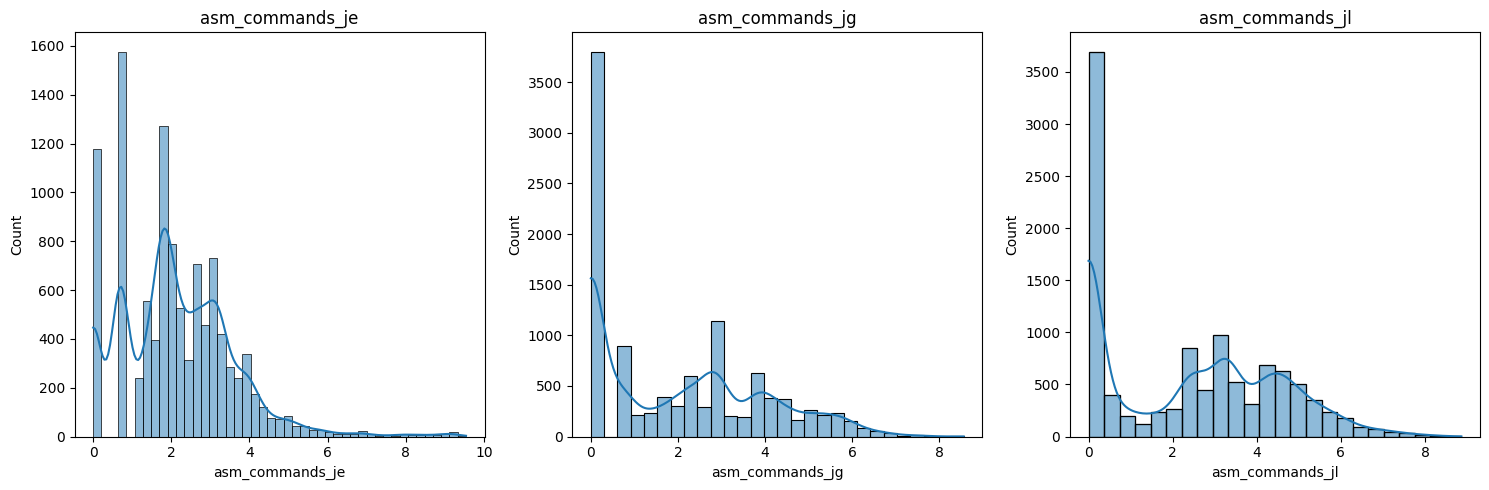

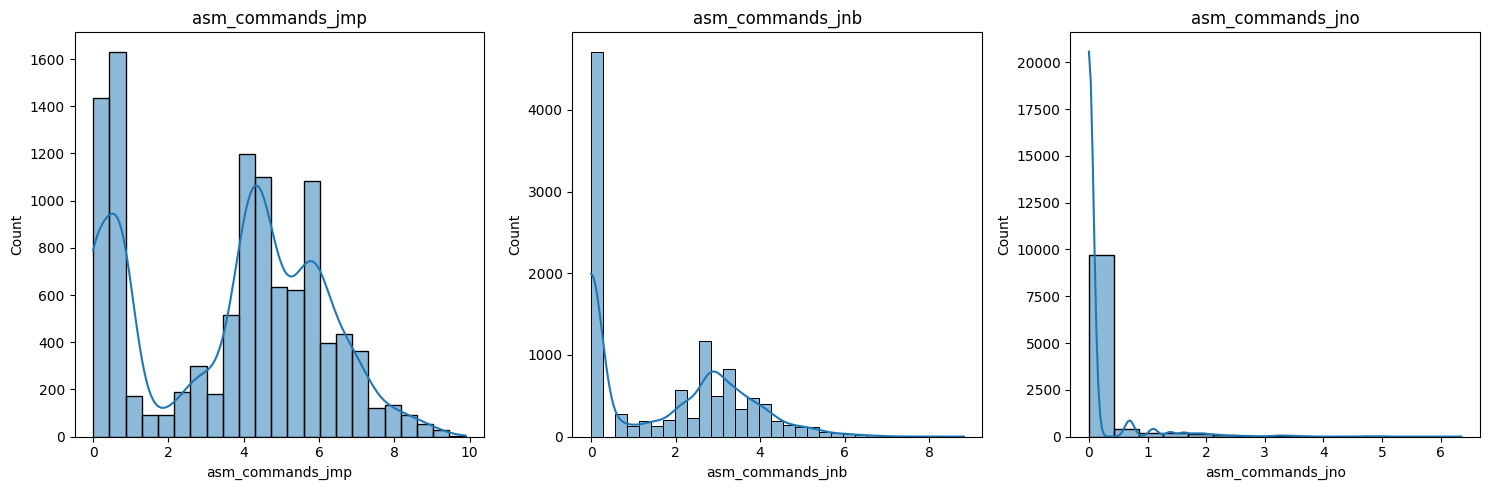

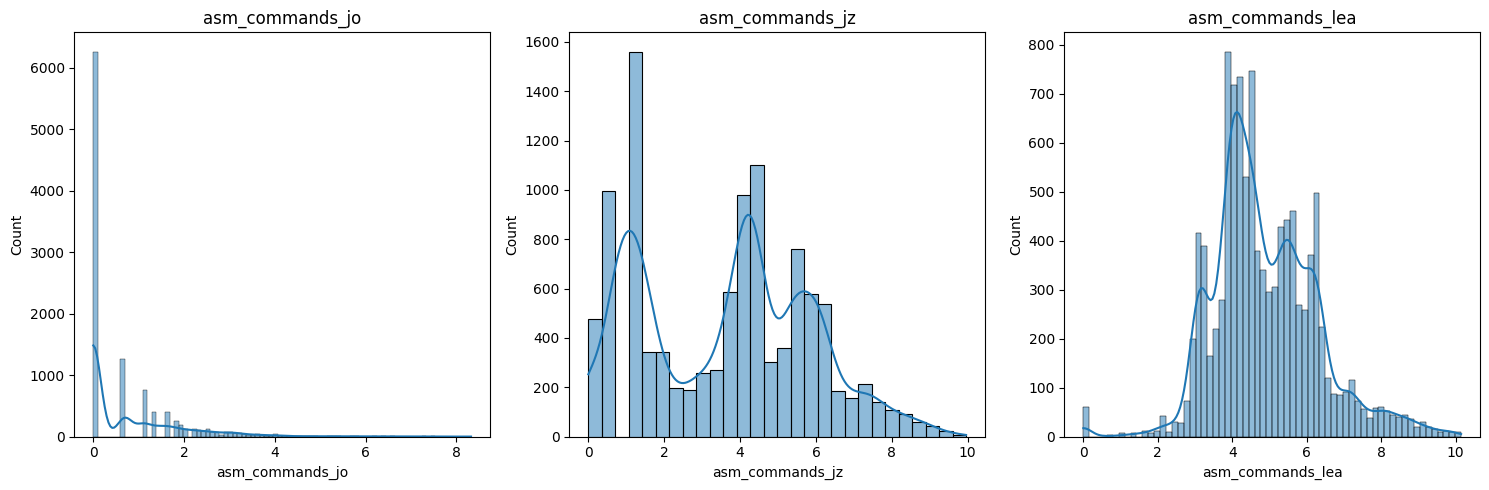

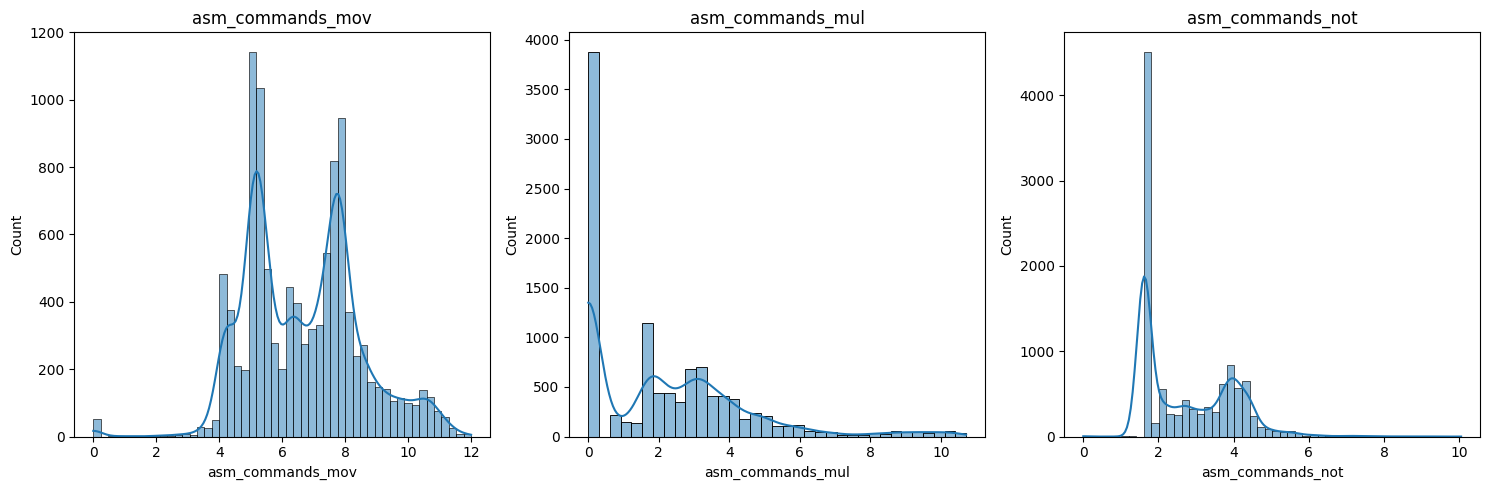

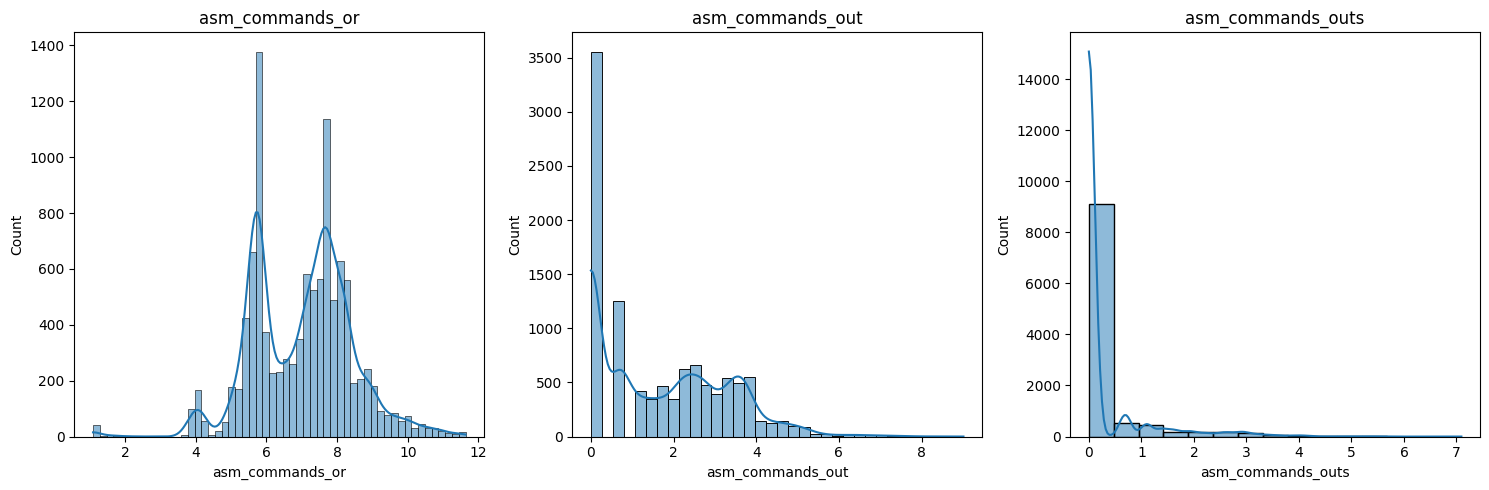

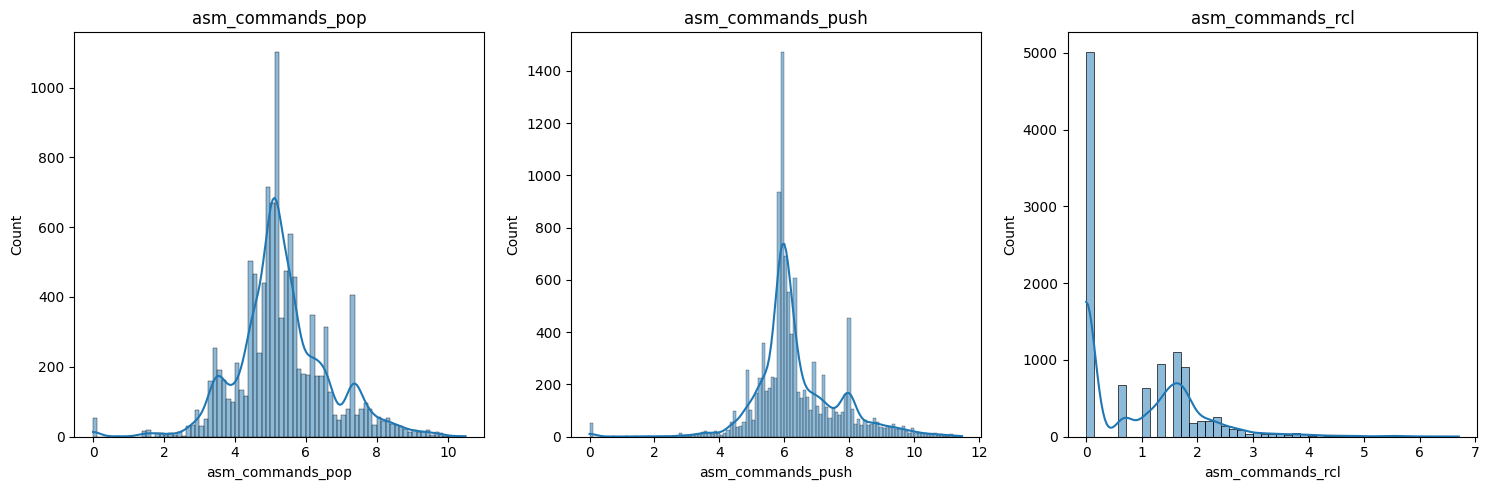

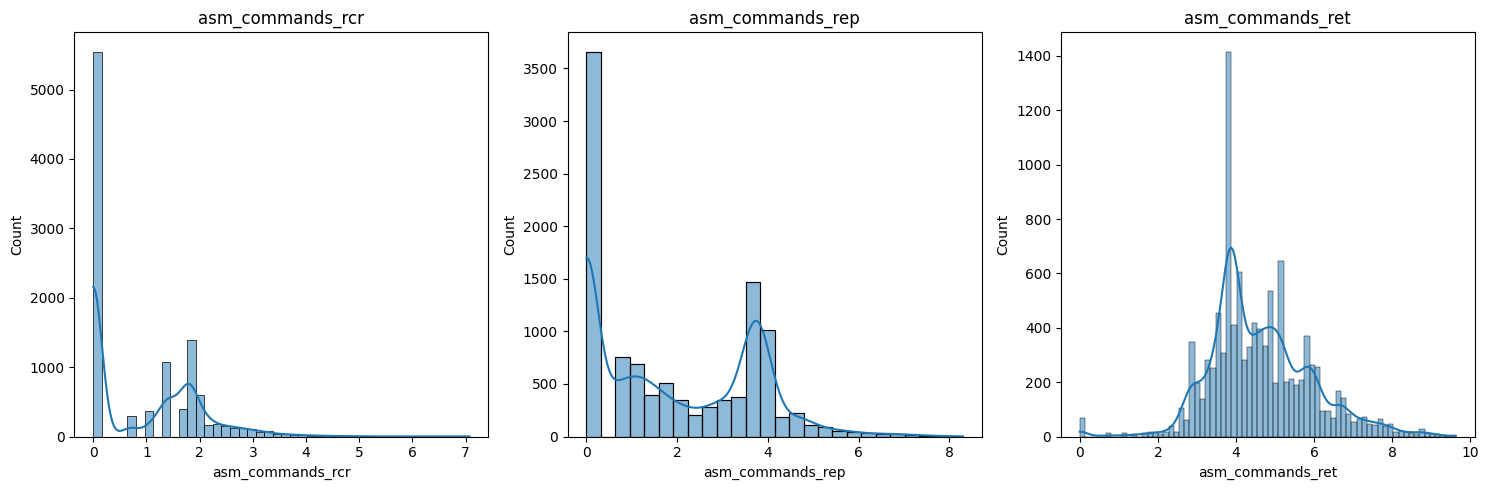

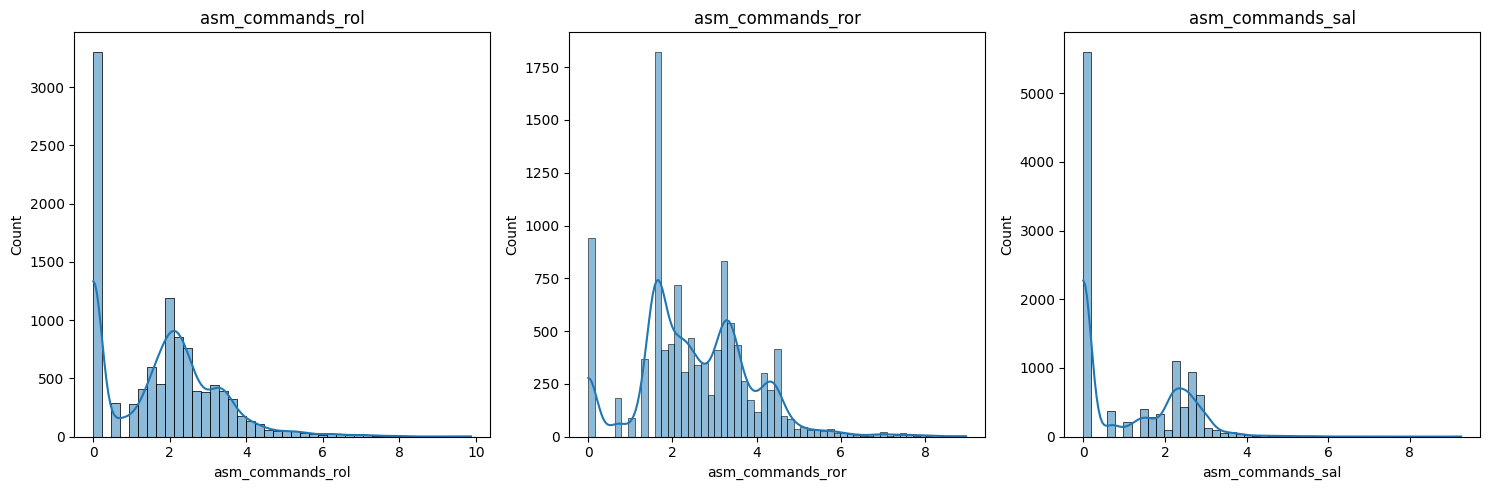

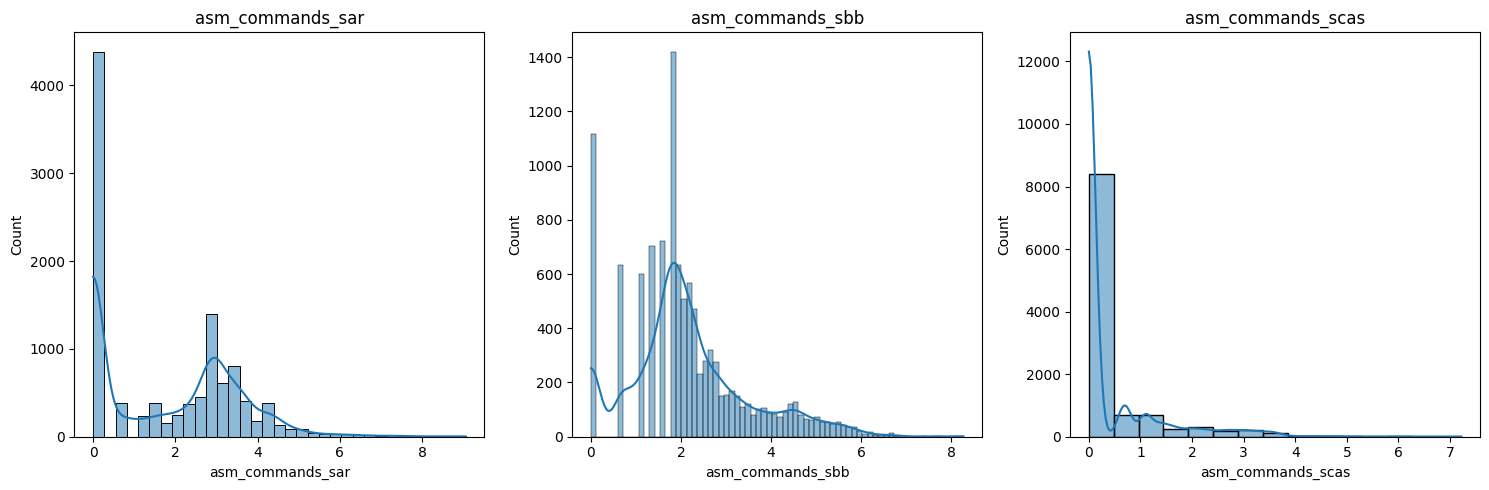

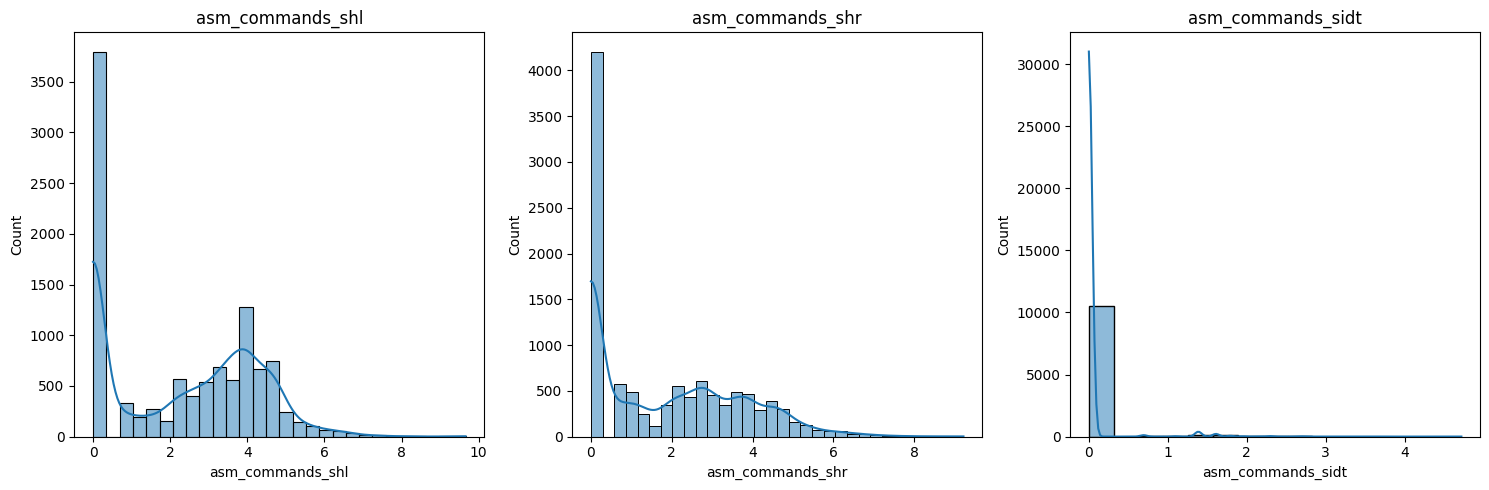

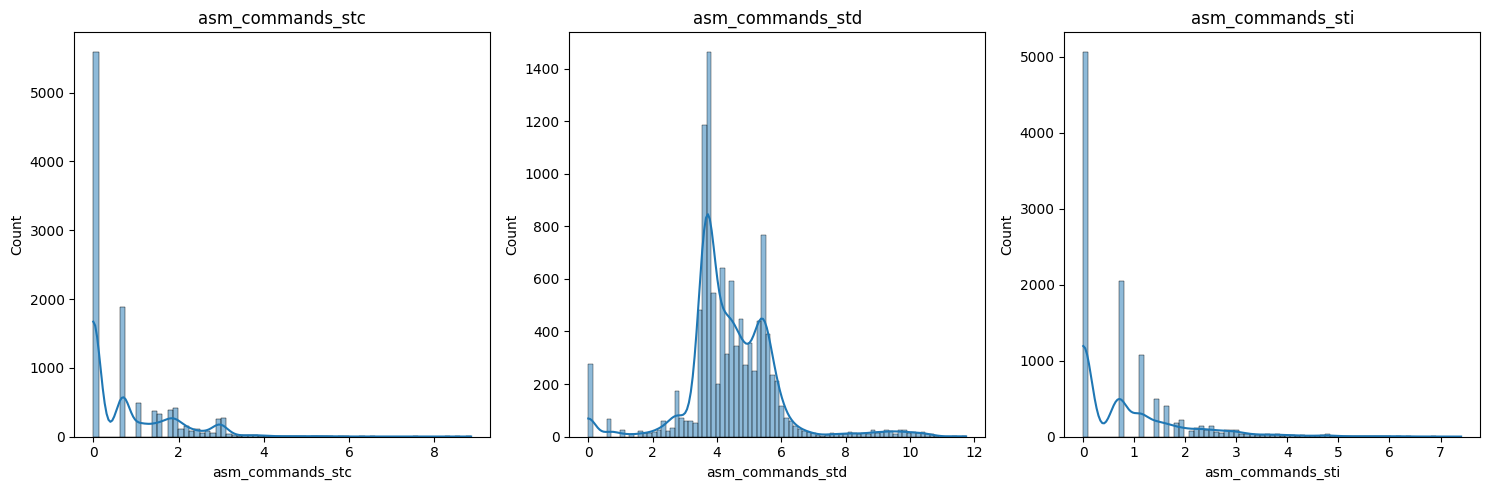

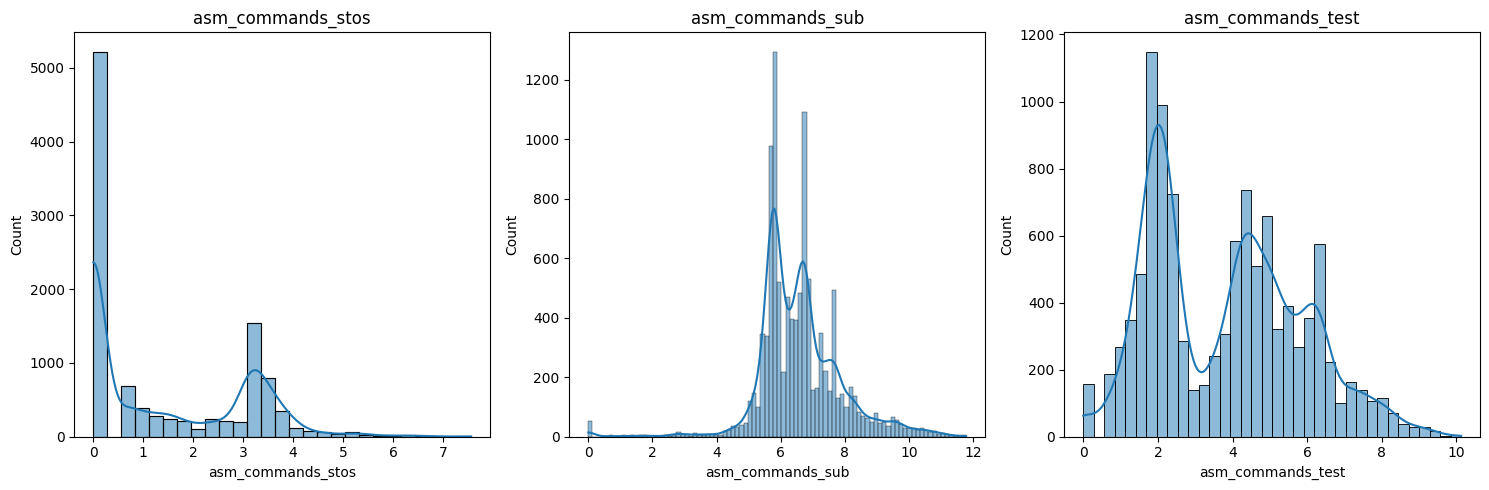

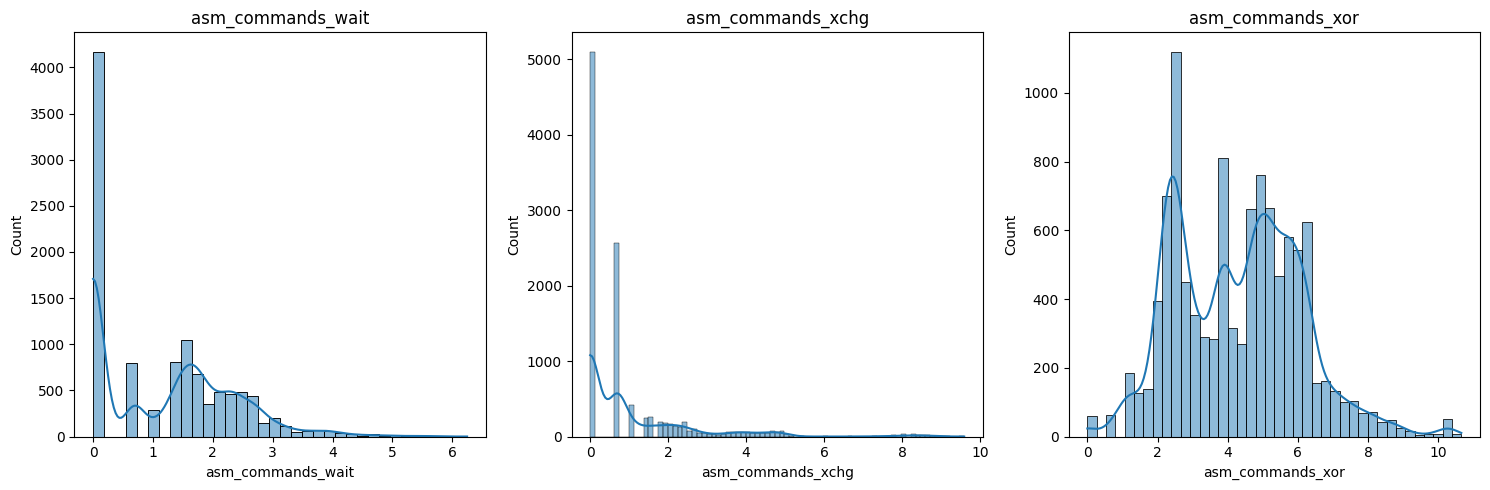

In [9]:
num = 0
for iter in range(22):
  plt.subplots(1, 3, figsize=(15, 5))
  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(data.columns[num])
    sns.histplot(x= np.log1p(data[data.columns[num]]), kde=True)
    num += 1

  plt.tight_layout()
  plt.show()

In [10]:
for col in data.columns[:-1]:
  data[col] = np.log1p(data[col])

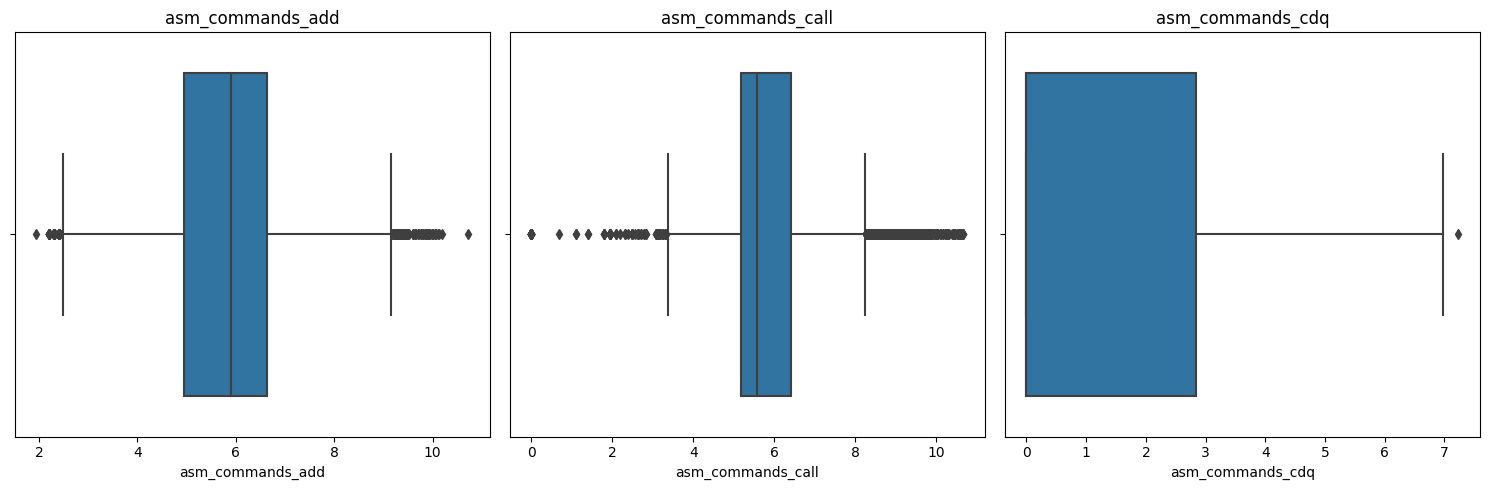

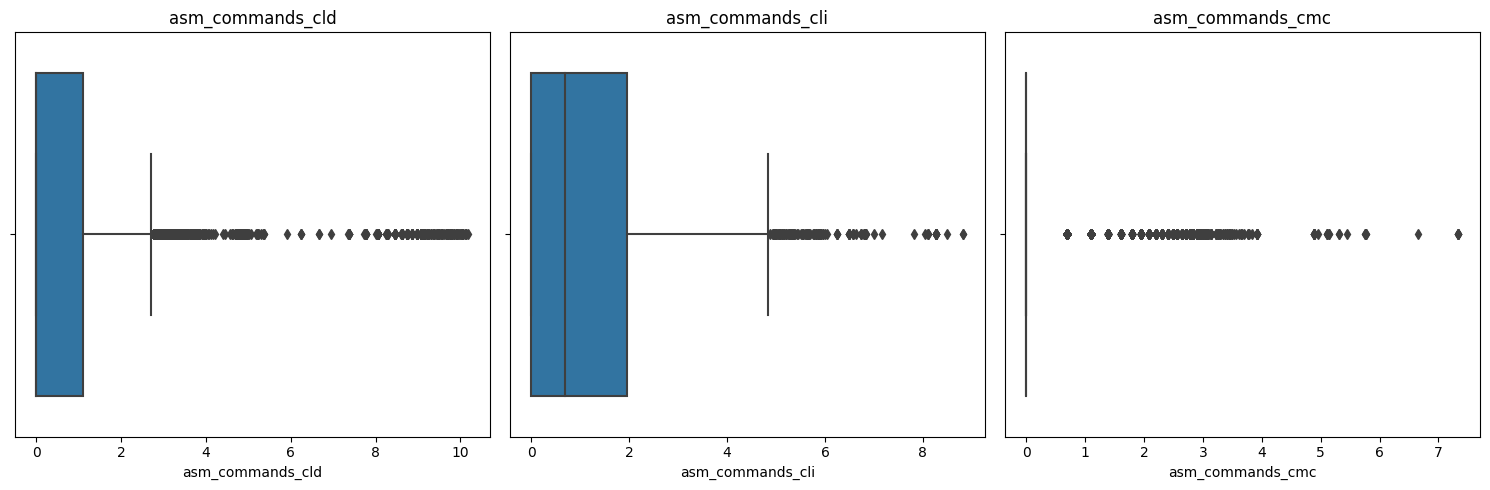

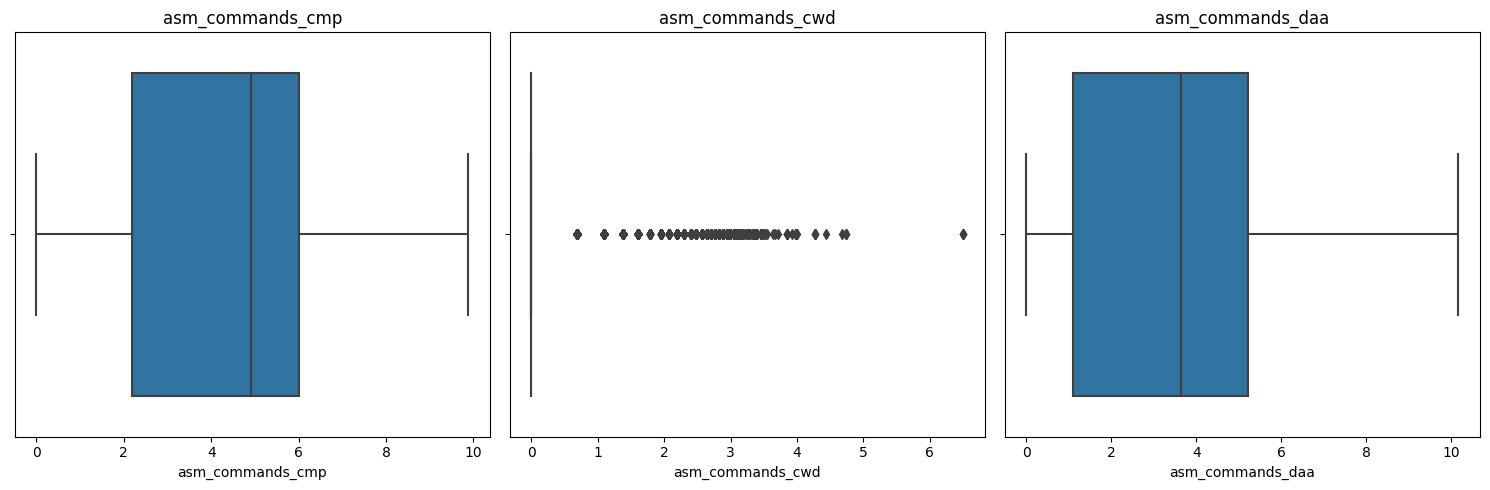

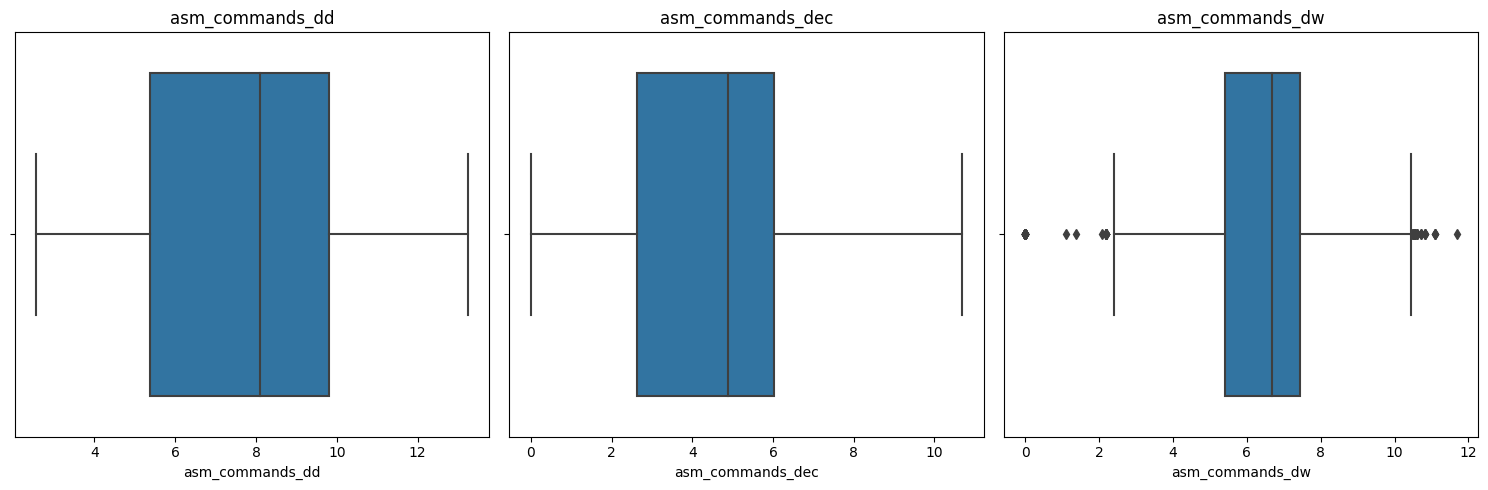

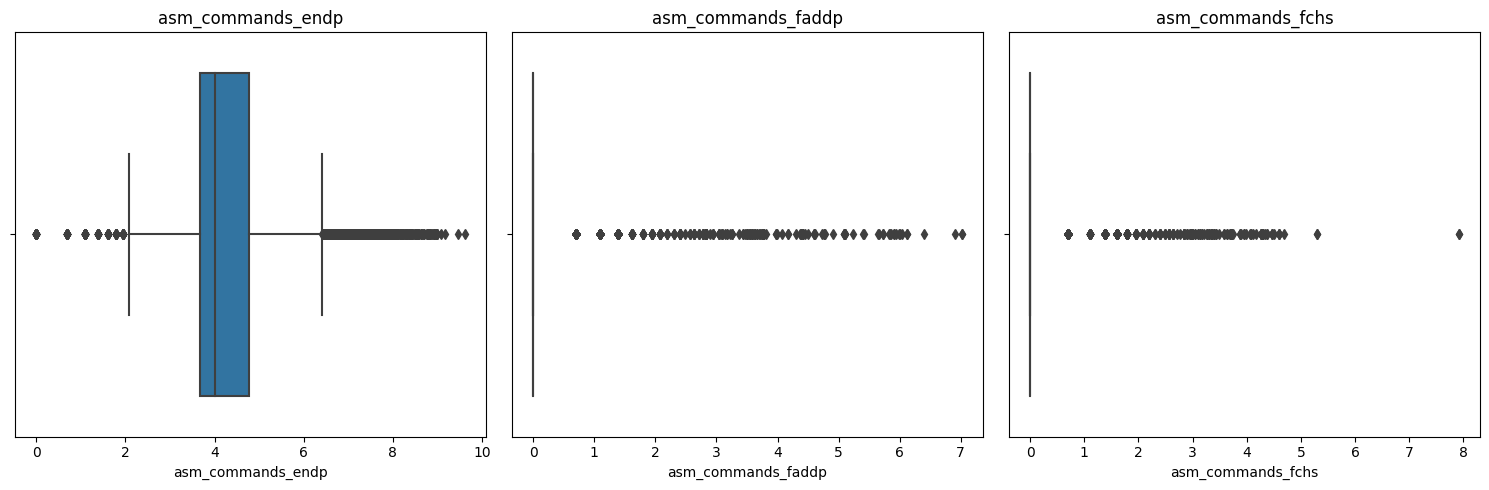

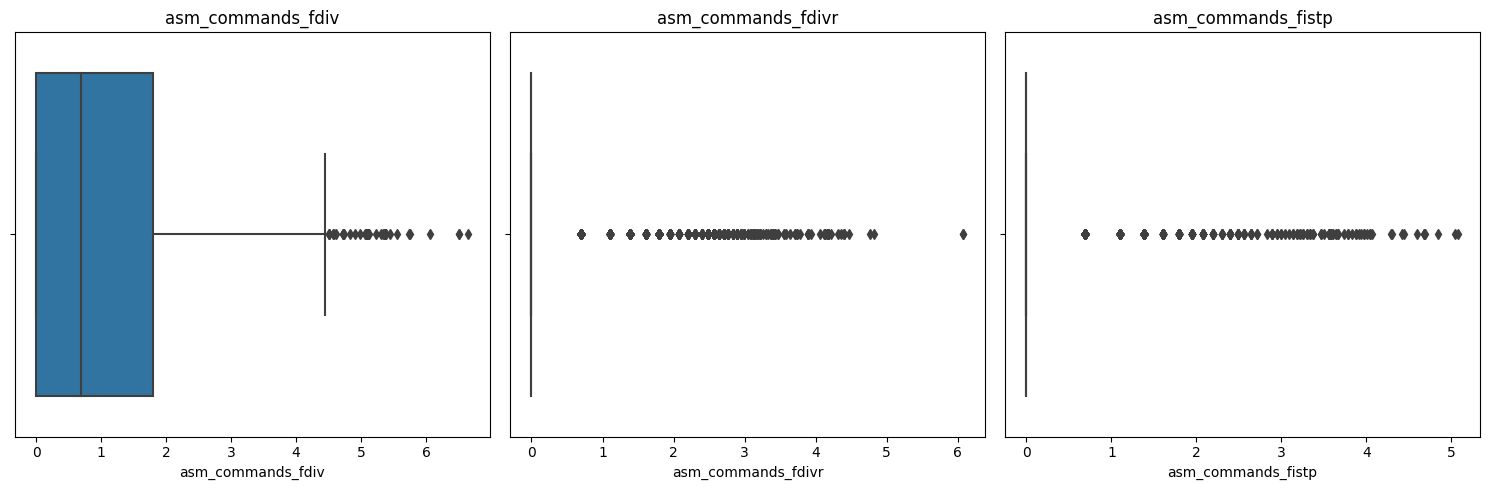

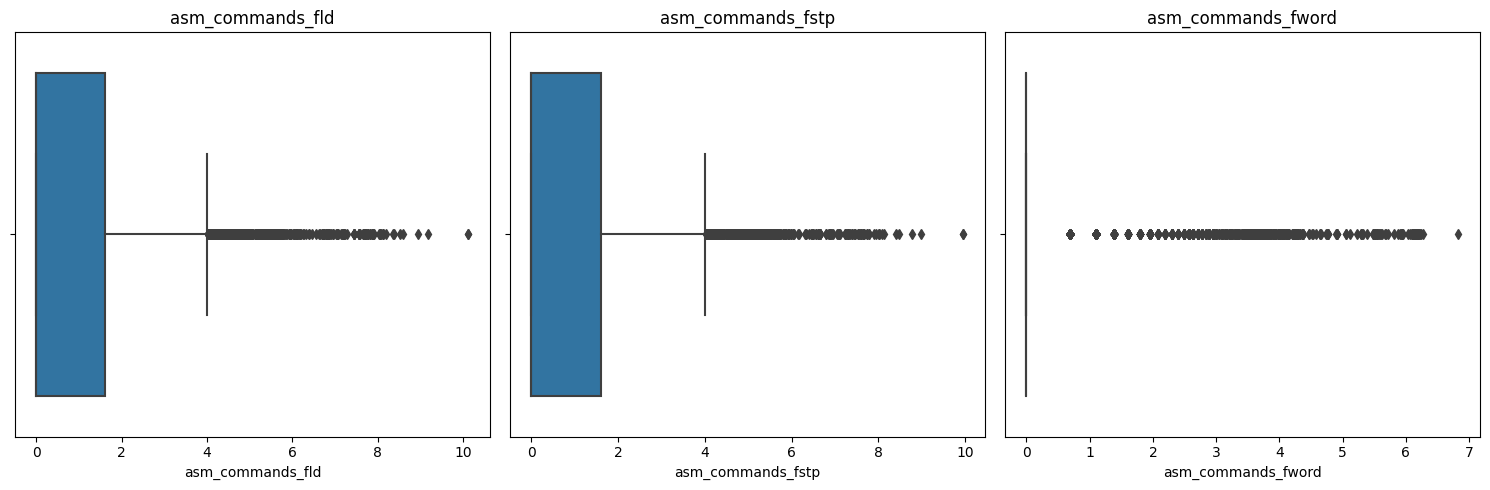

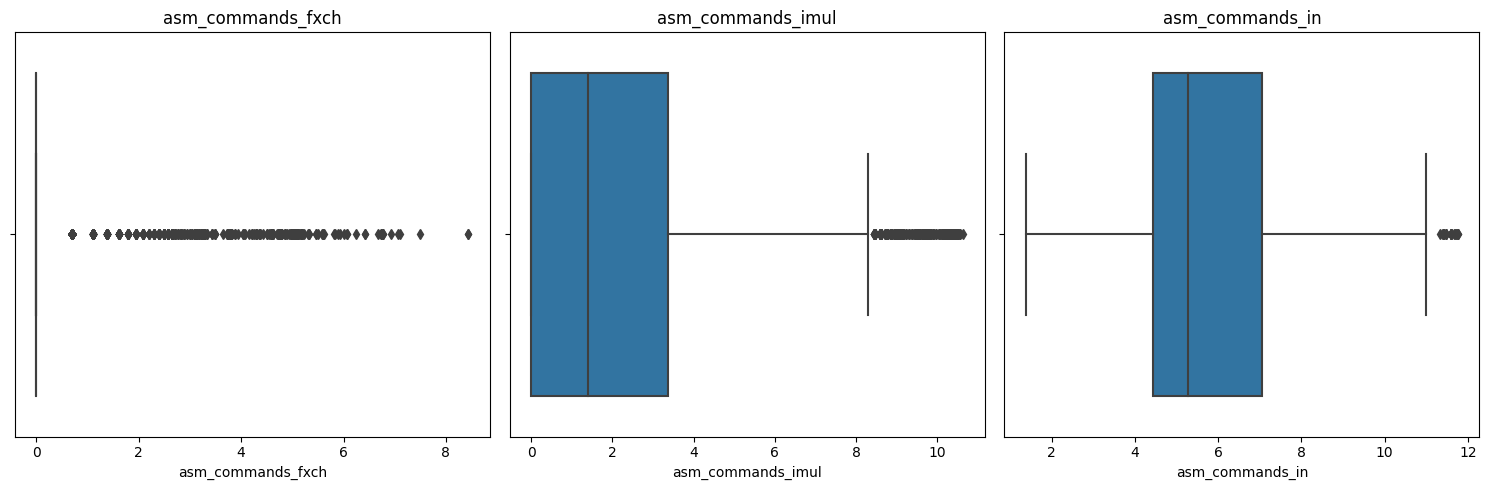

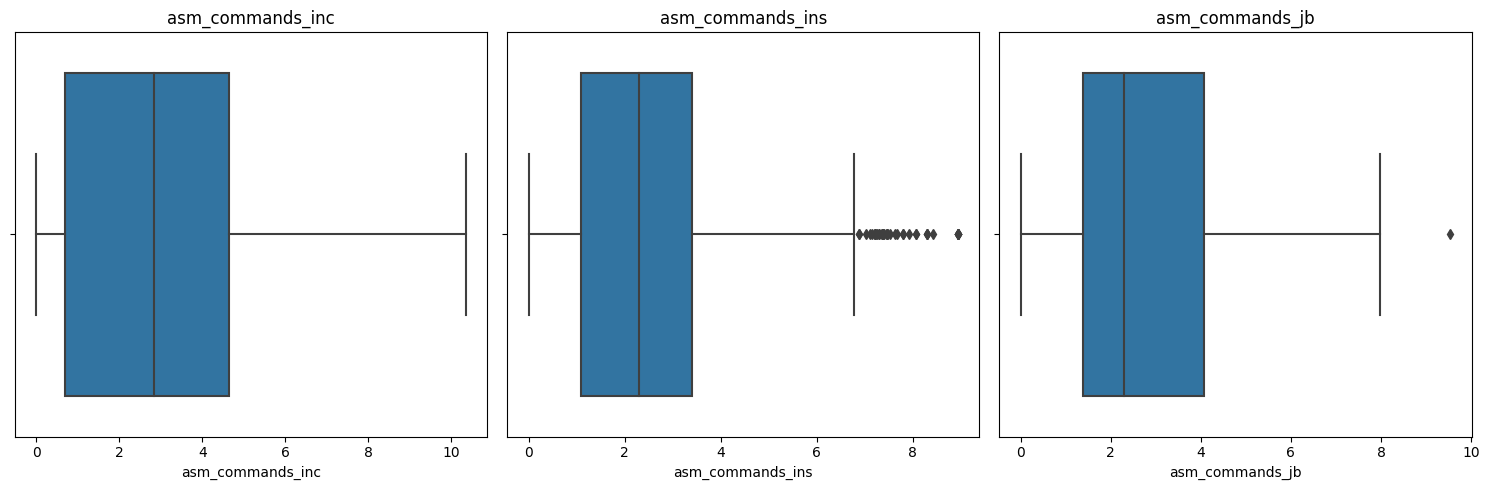

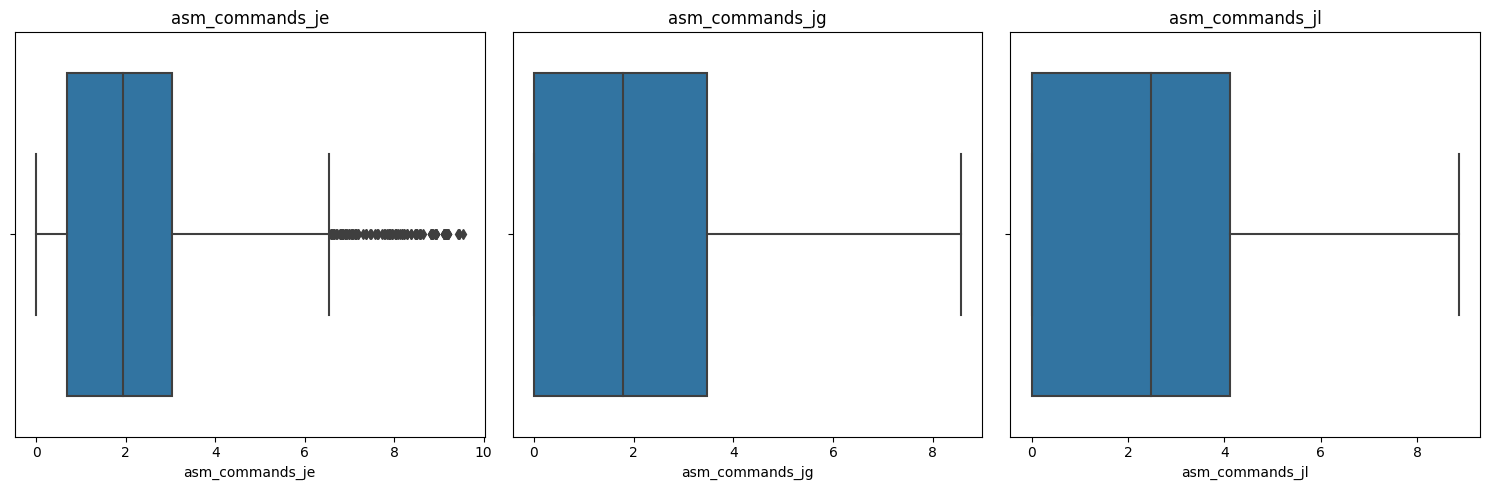

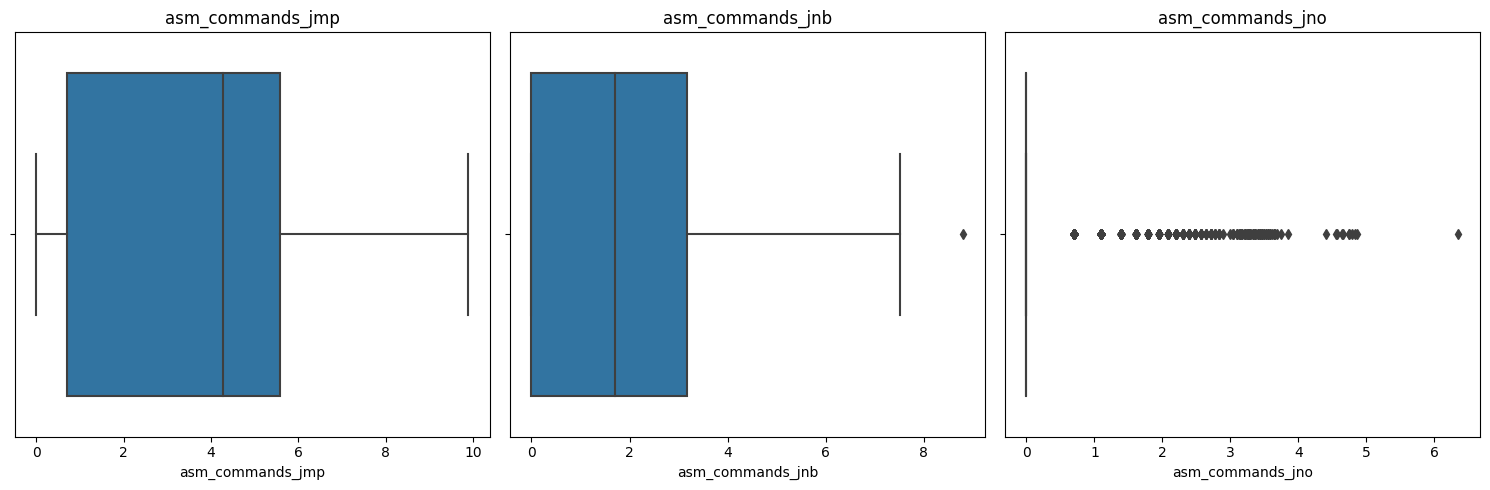

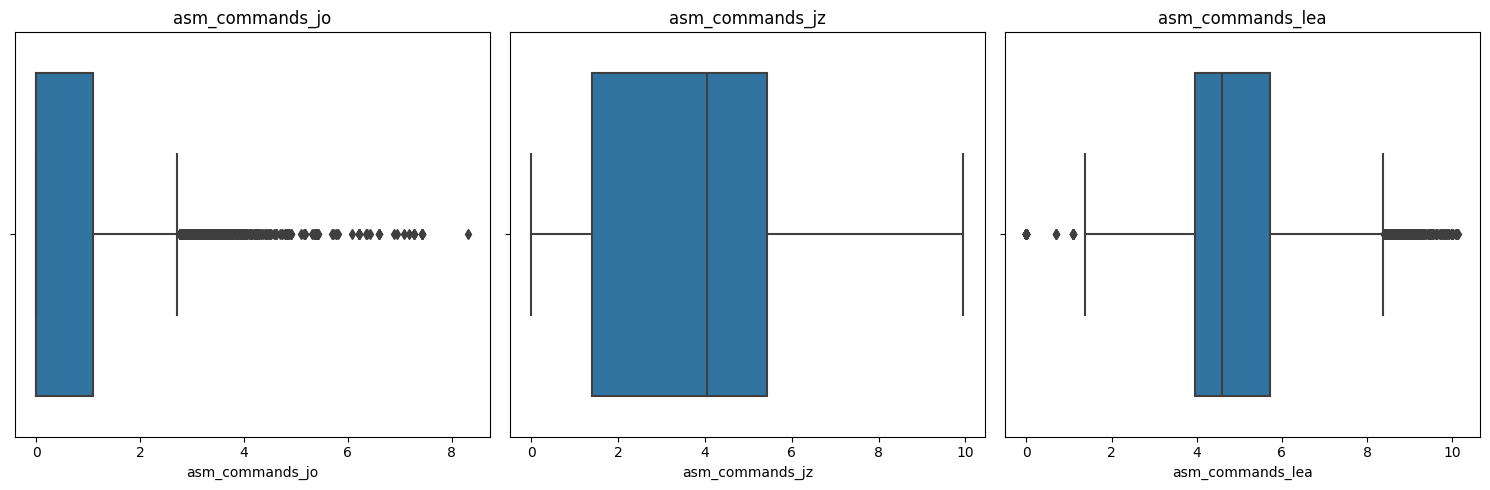

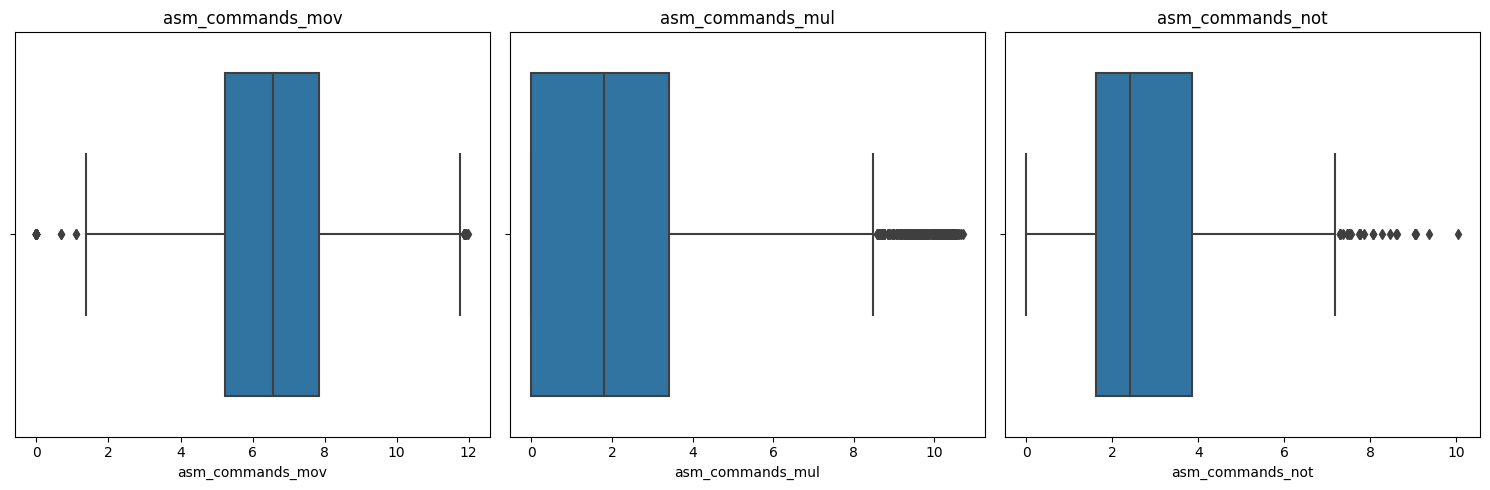

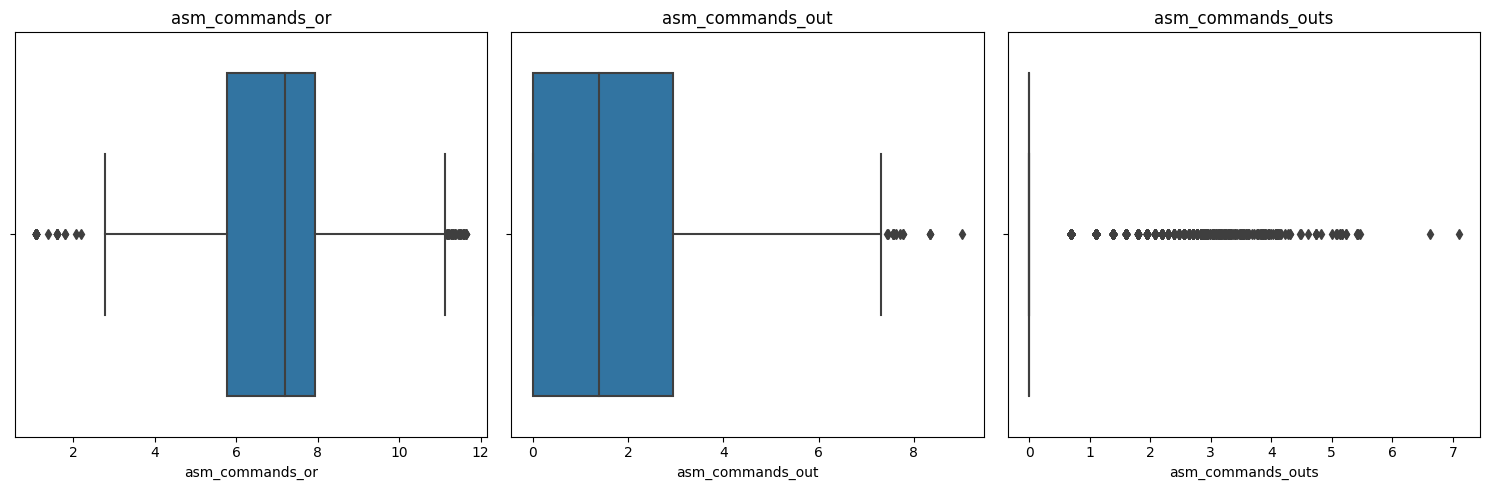

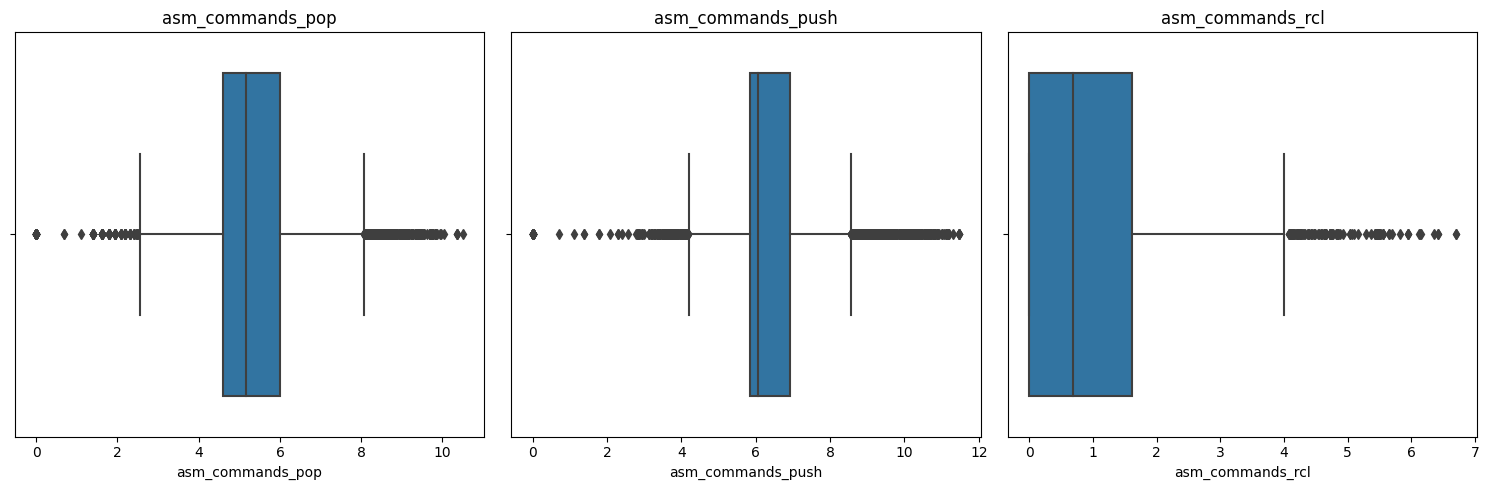

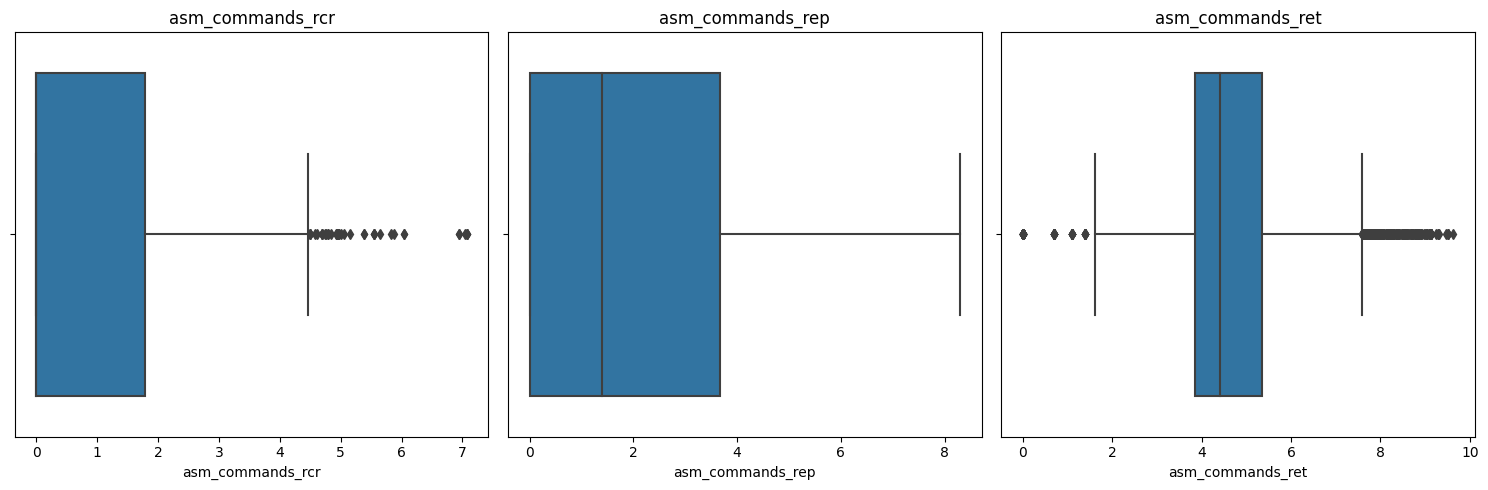

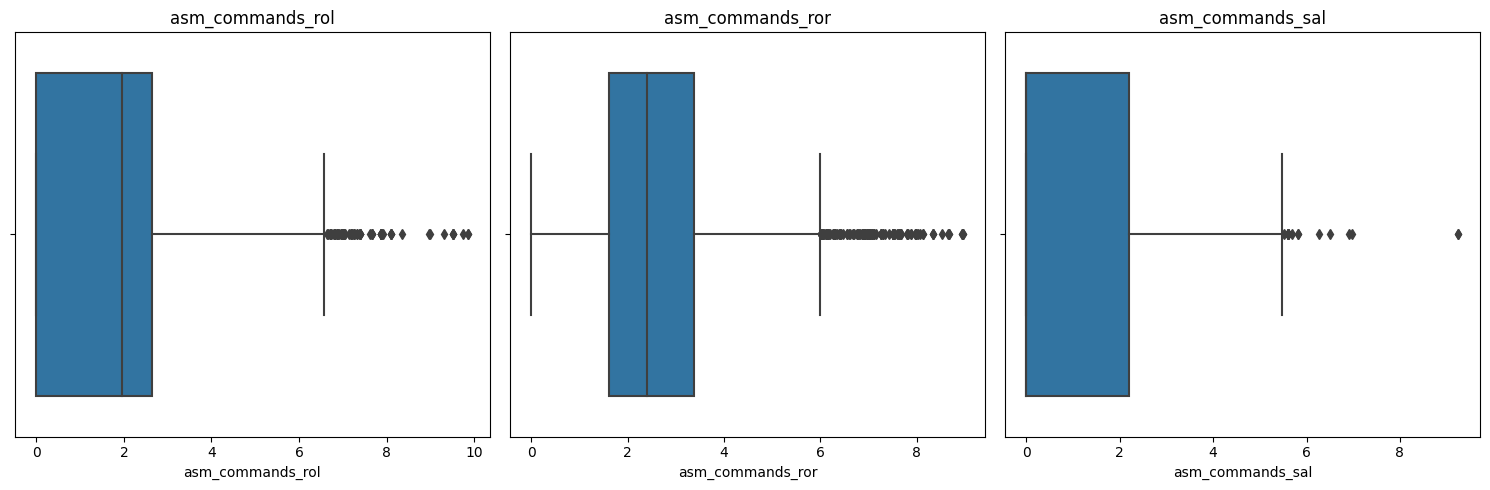

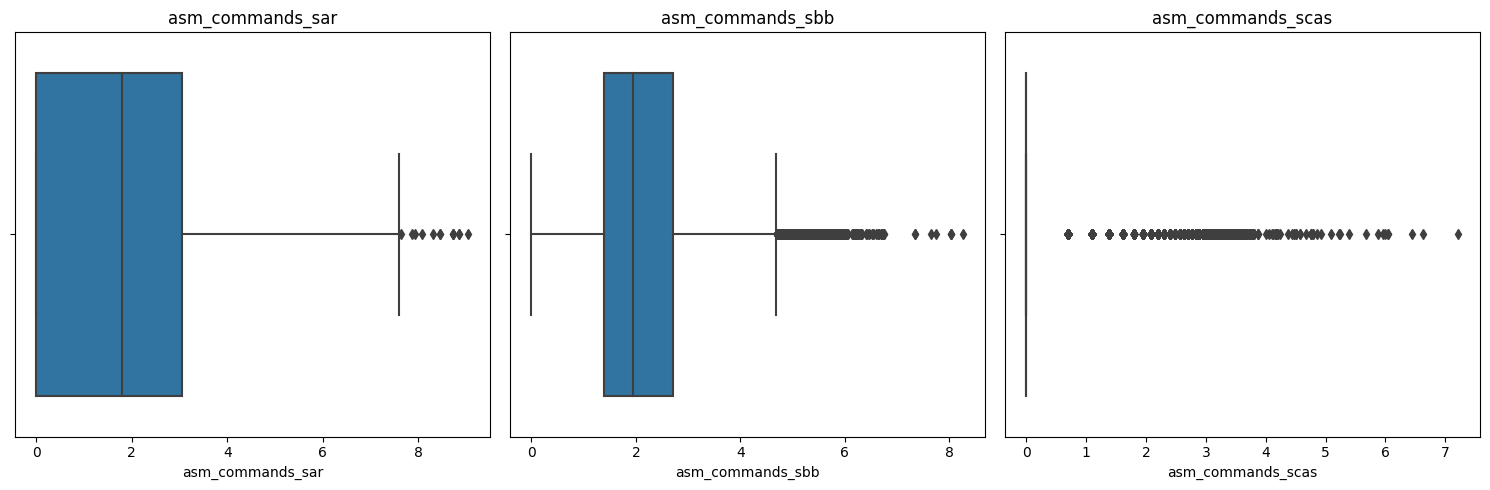

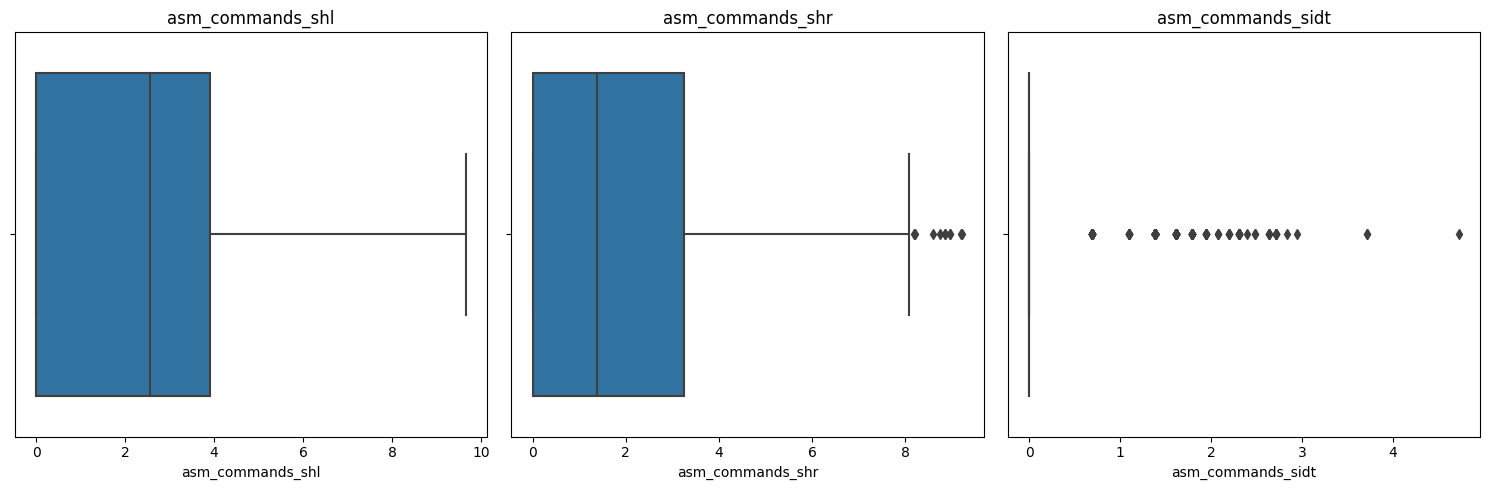

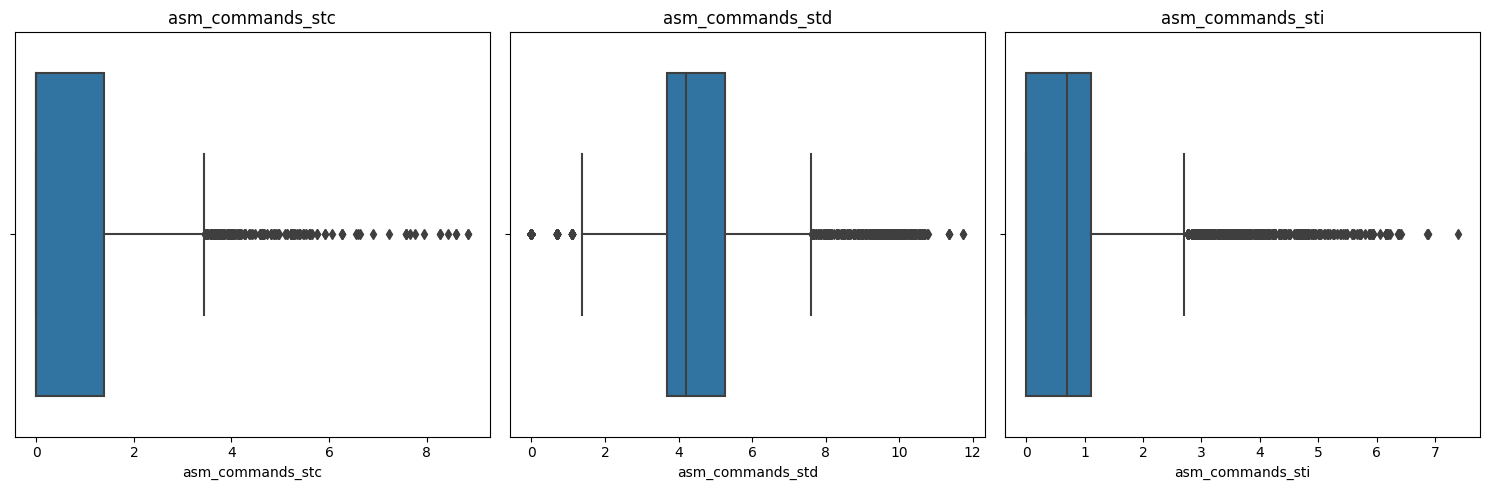

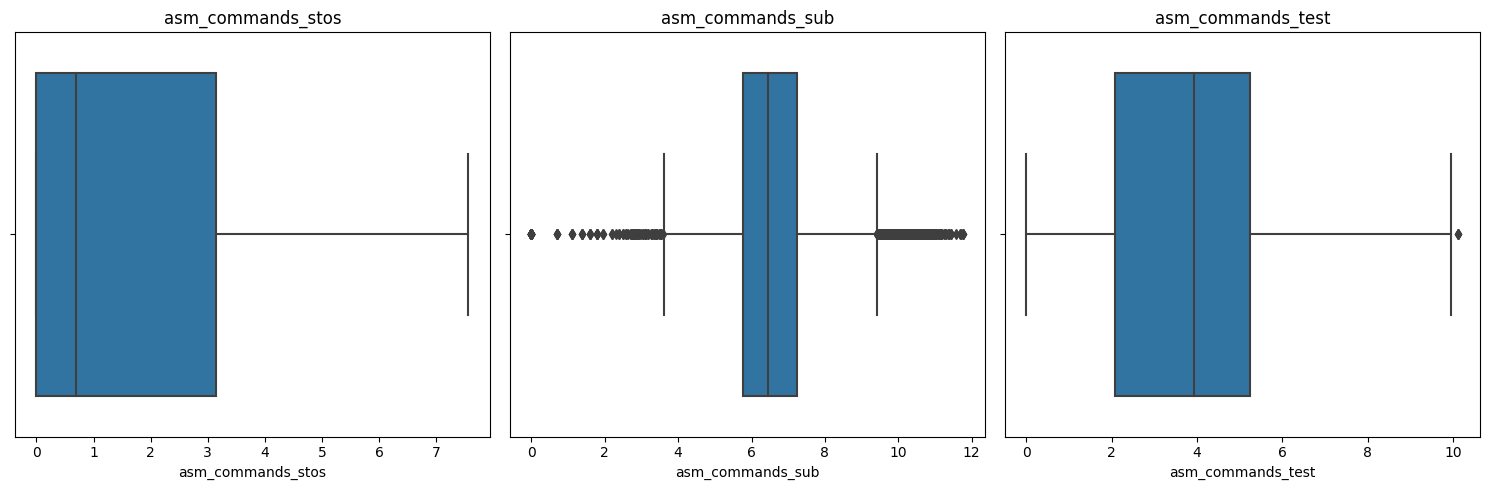

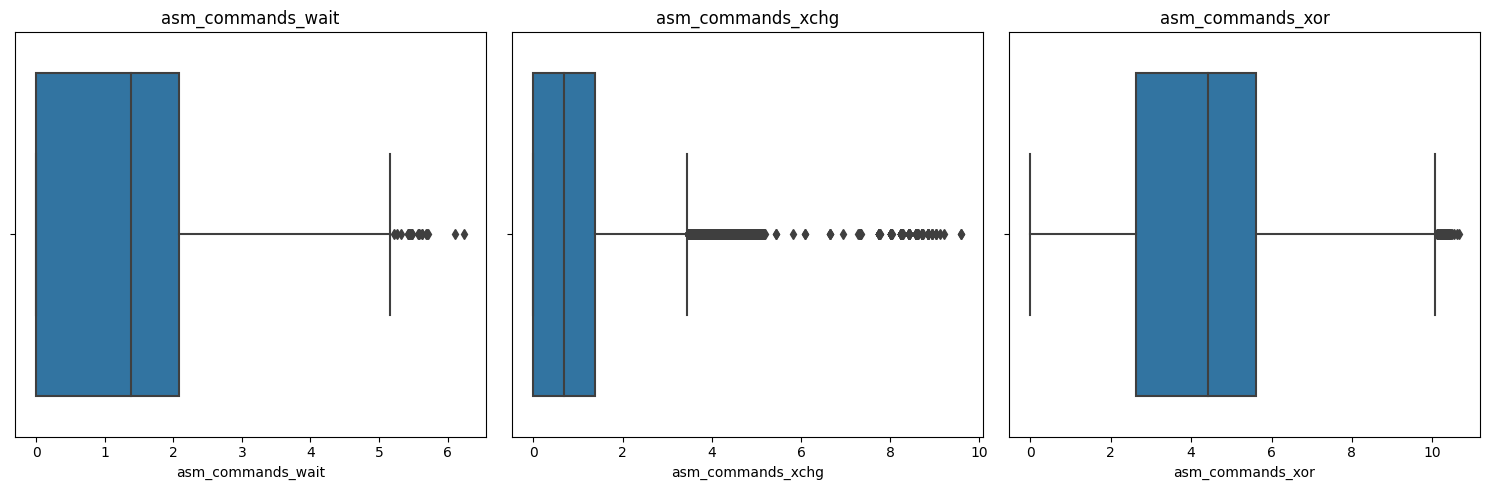

In [11]:
num = 0
for iter in range(22):
  plt.subplots(1, 3, figsize=(15, 5))
  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(data.columns[num])
    sns.boxplot(x= data[data.columns[num]])
    num += 1

  plt.tight_layout()
  plt.show()

**Insight:** Here we can't draw coluclution about outliers becouse these outliers can be usefull in some cases to classifie the classes

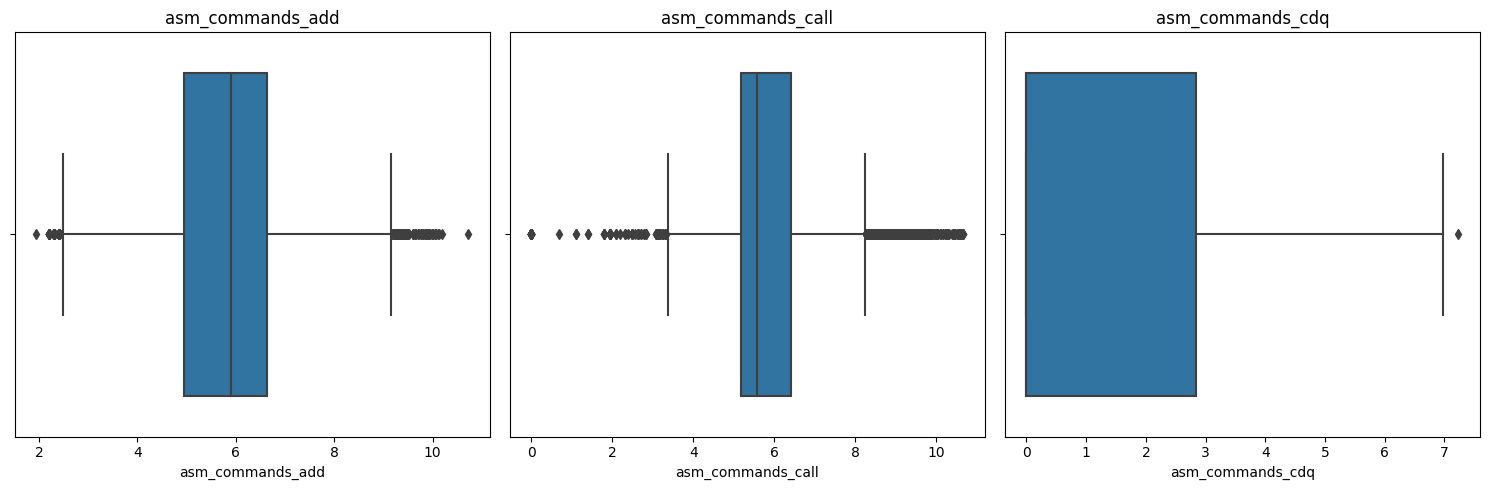

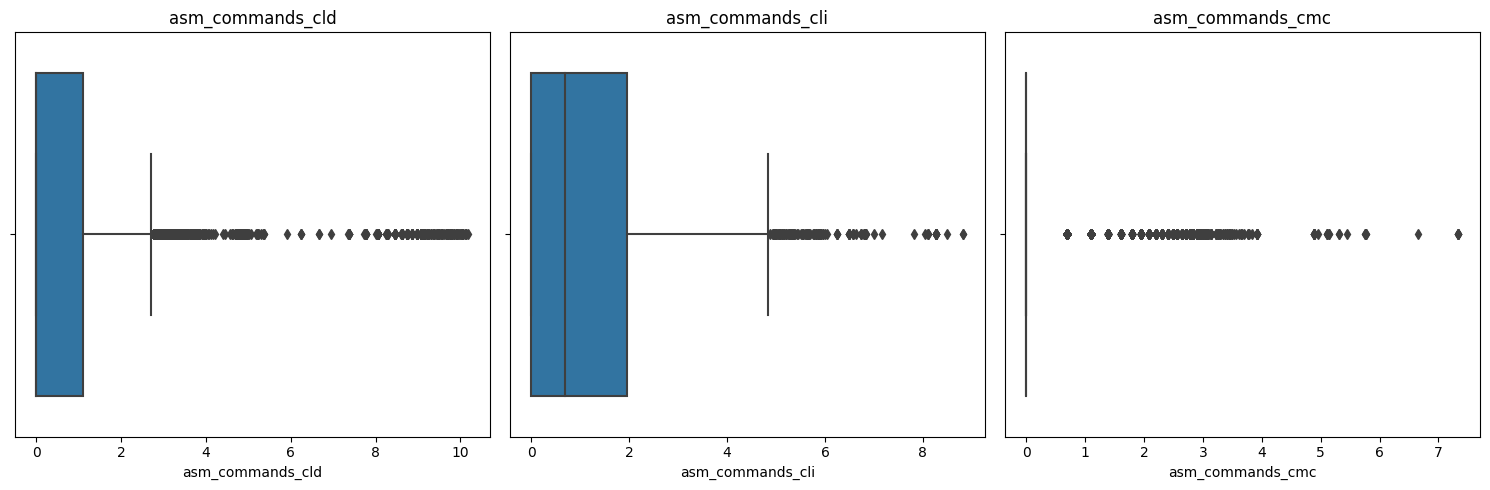

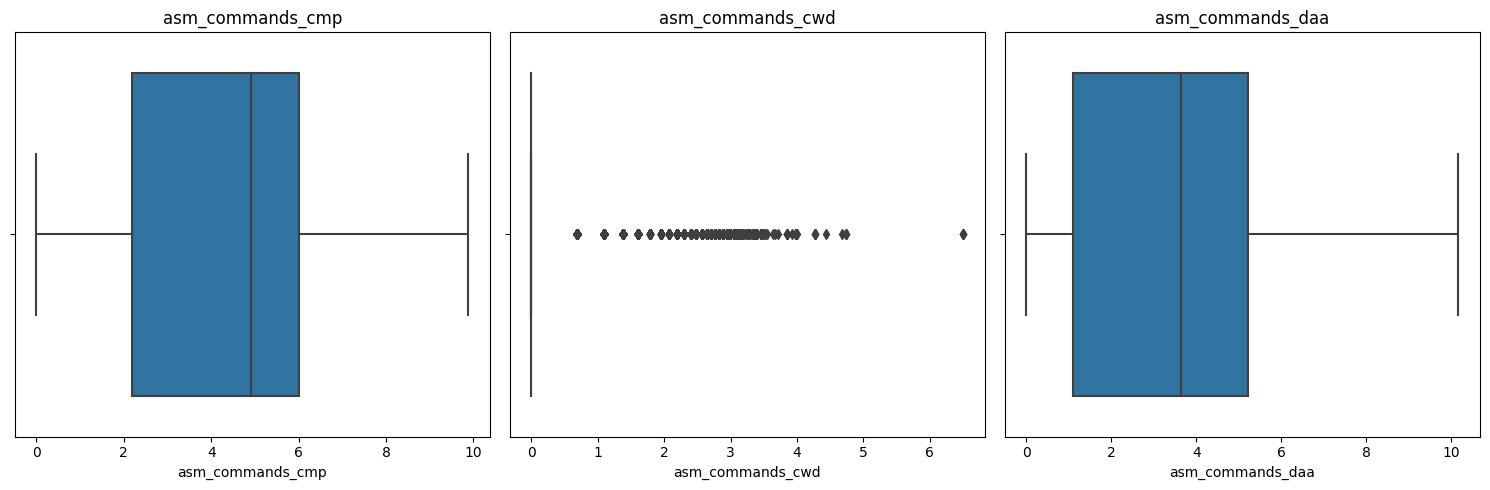

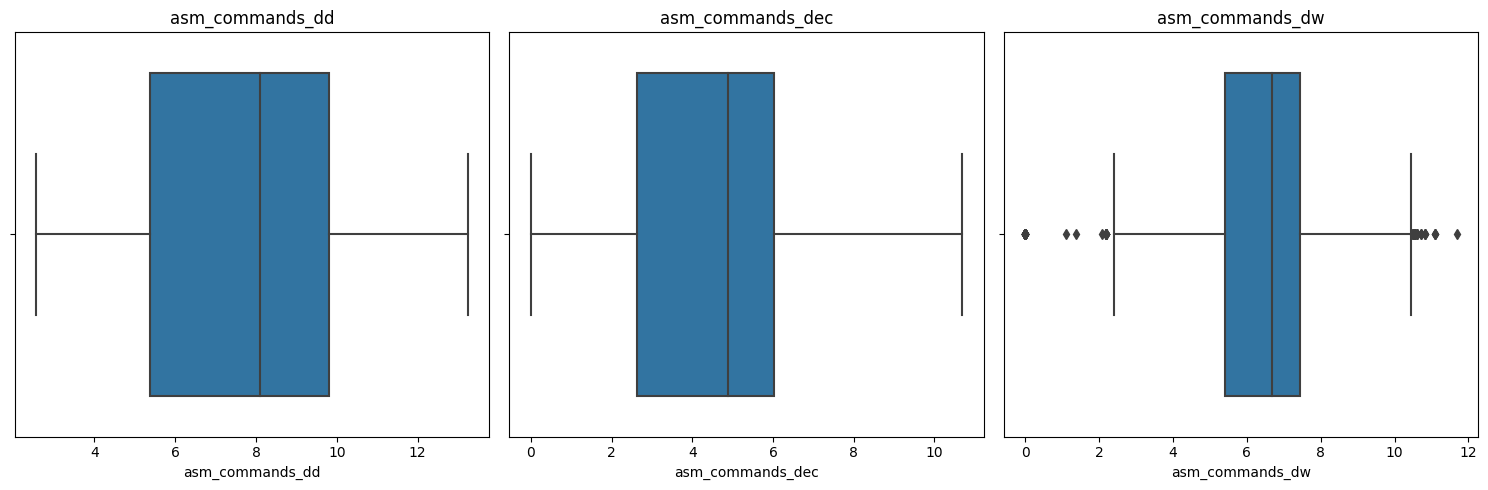

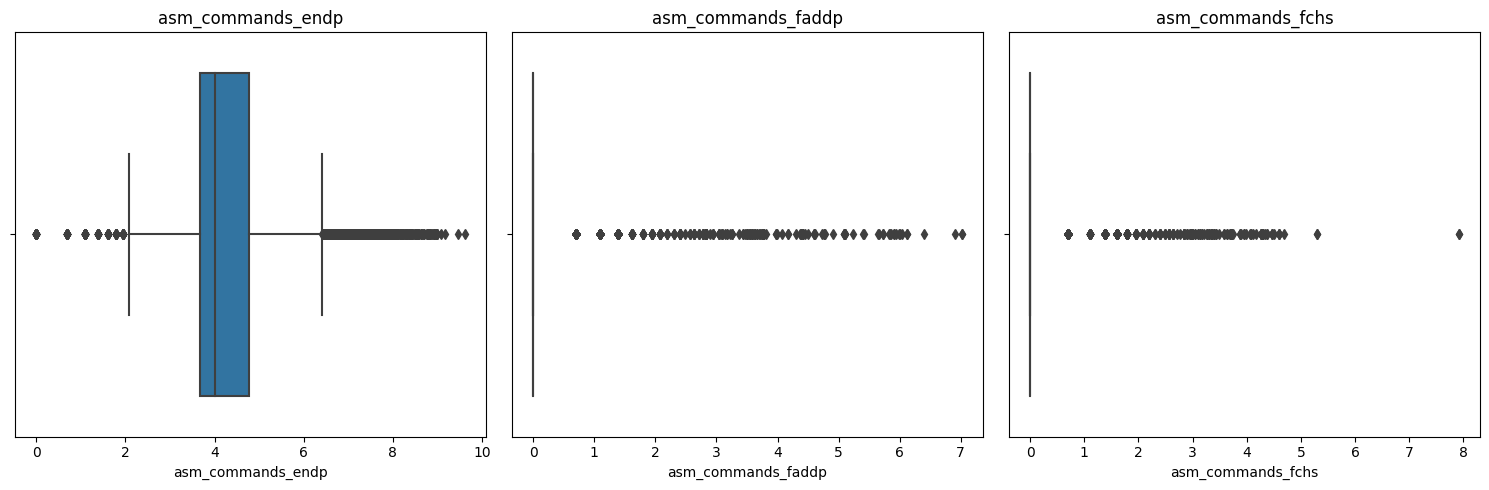

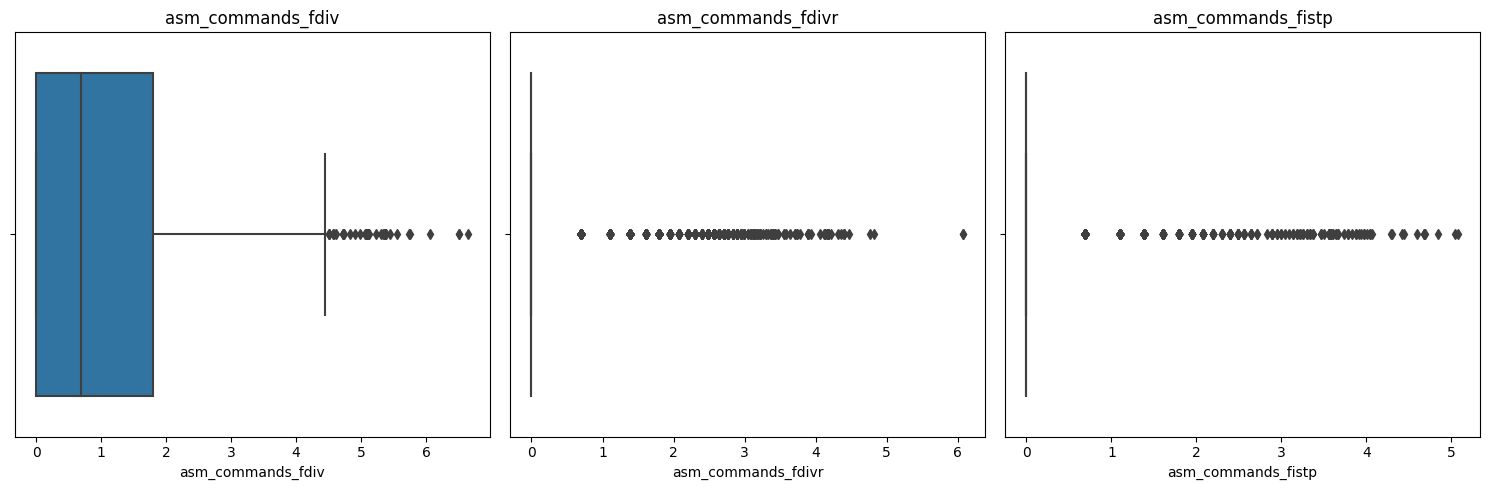

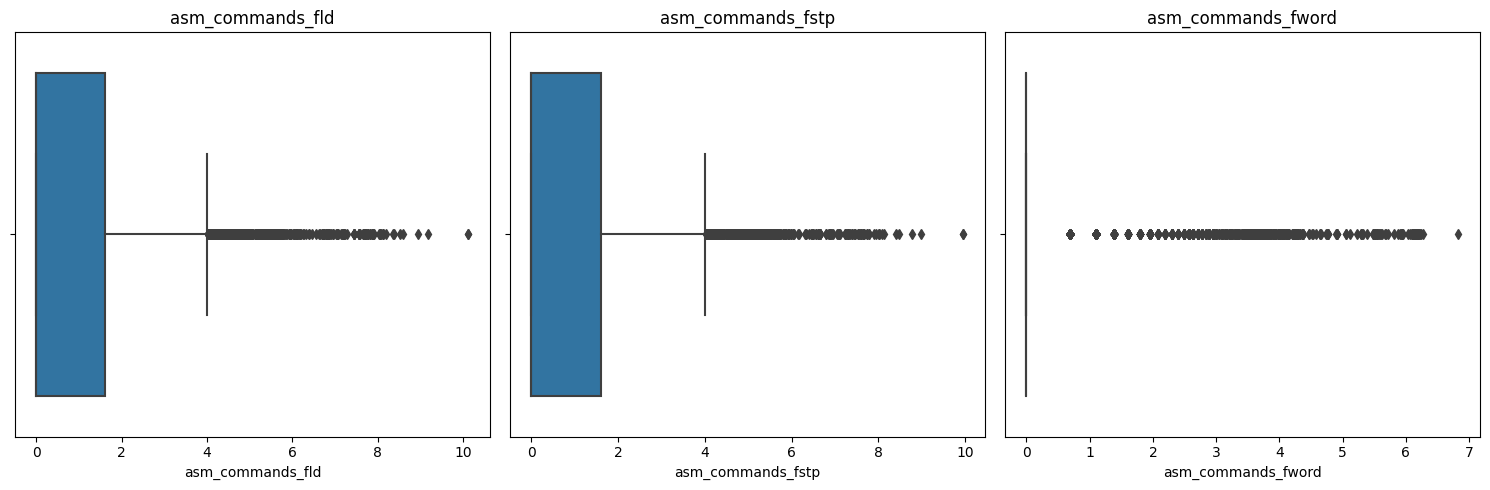

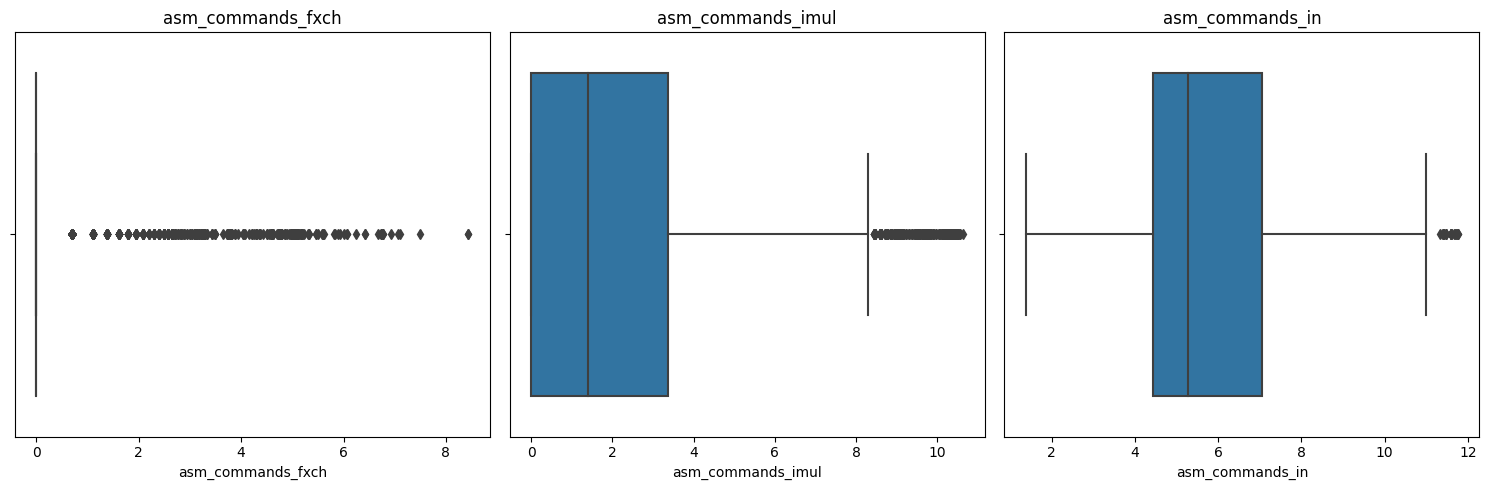

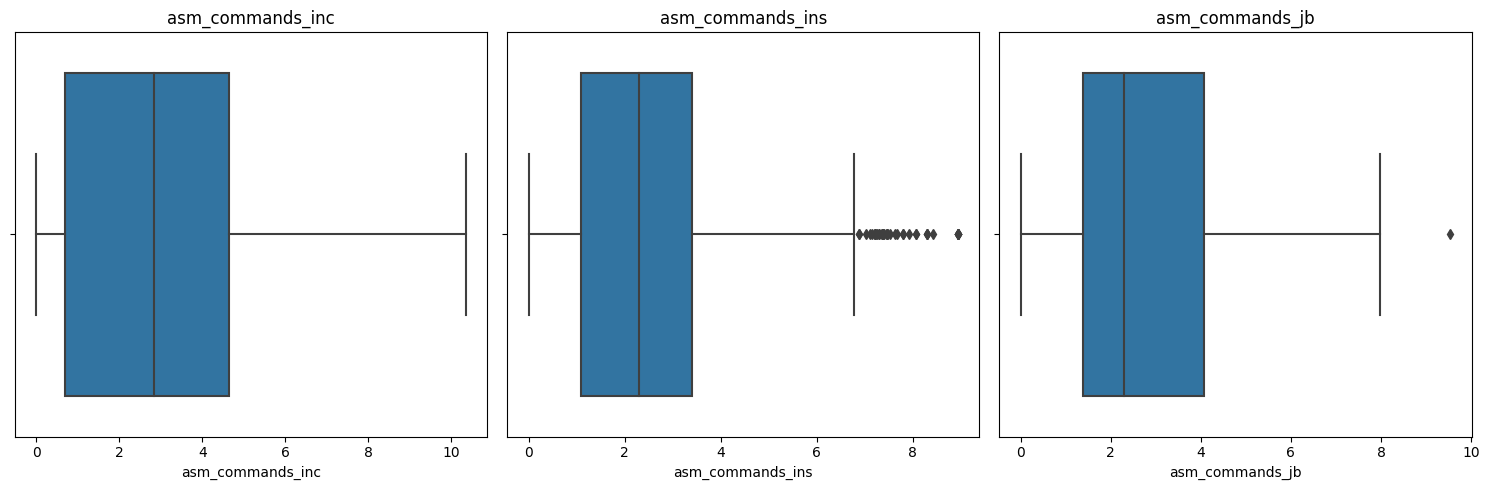

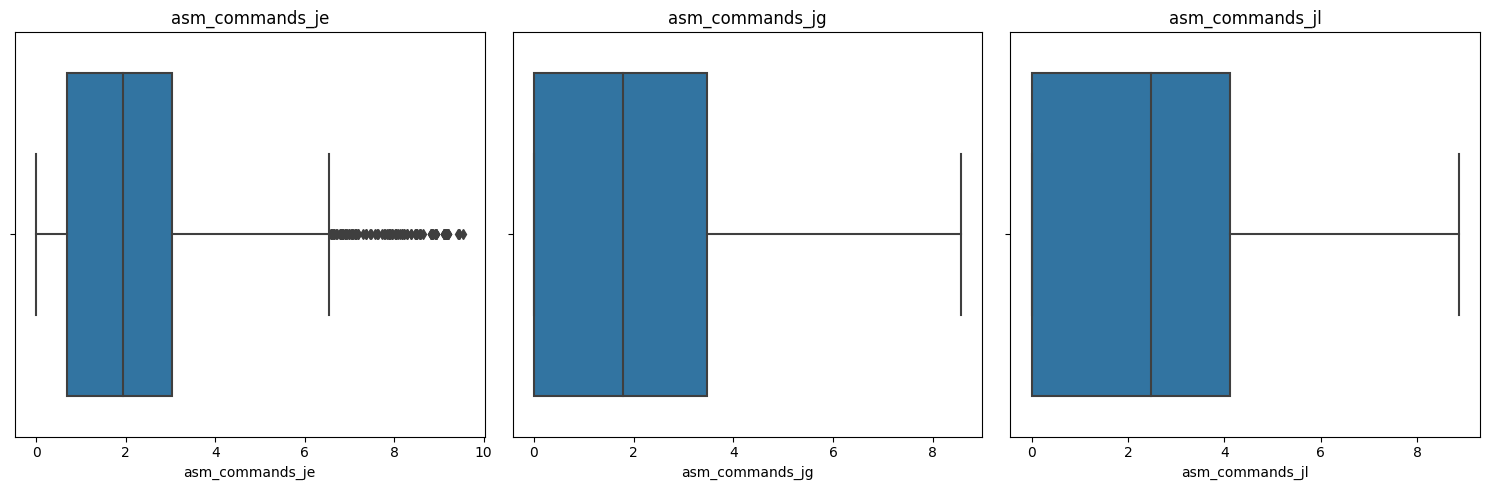

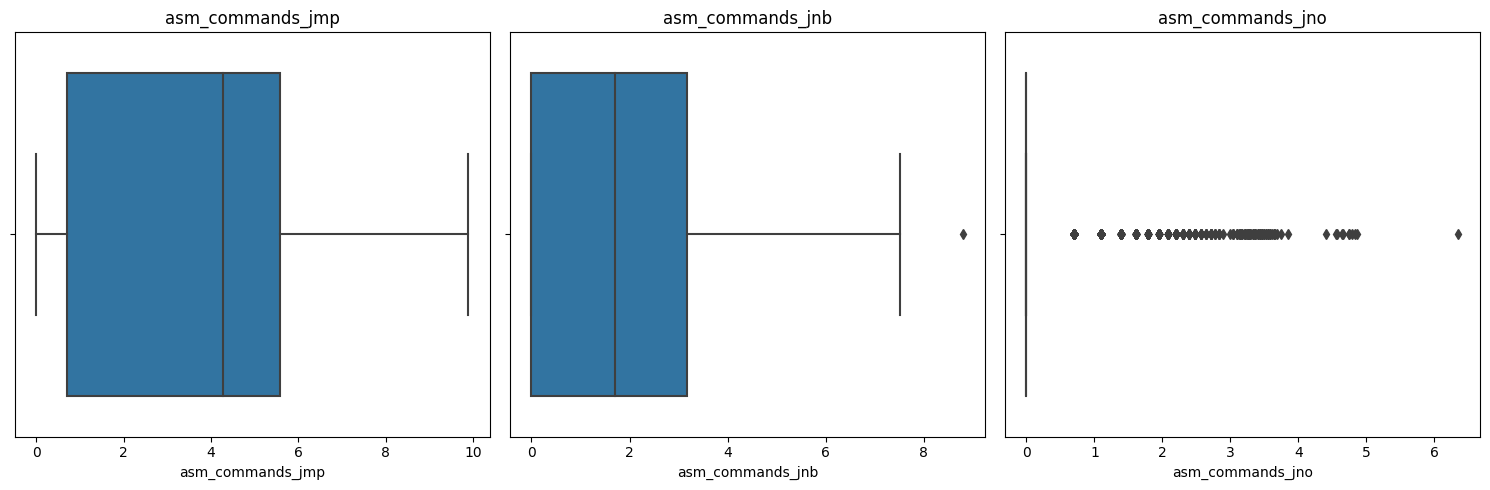

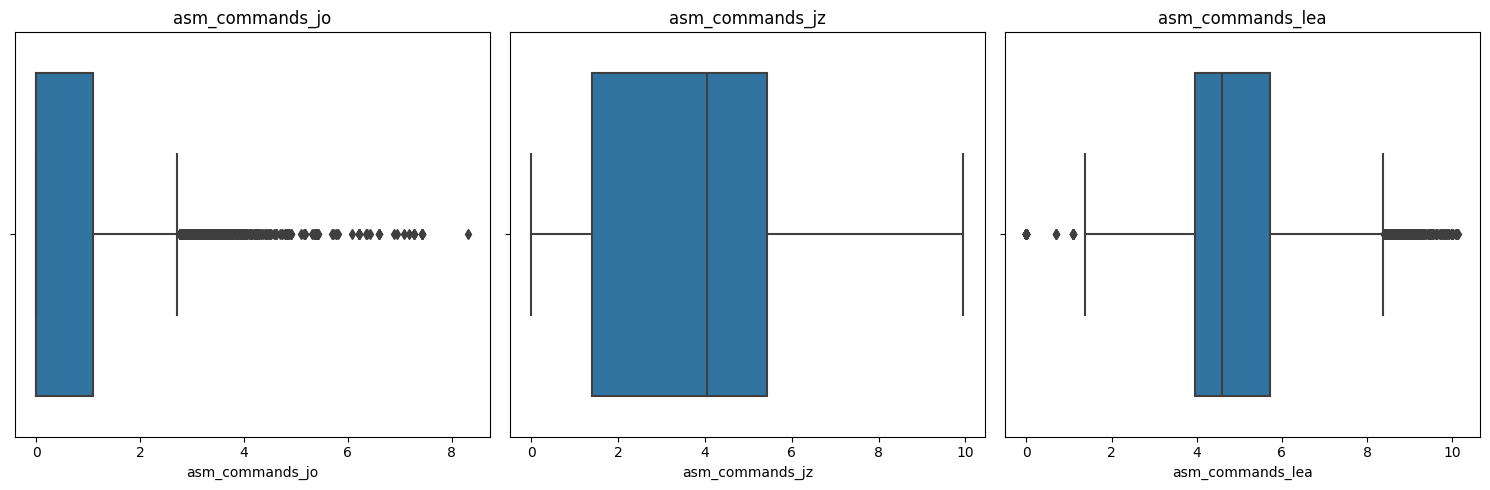

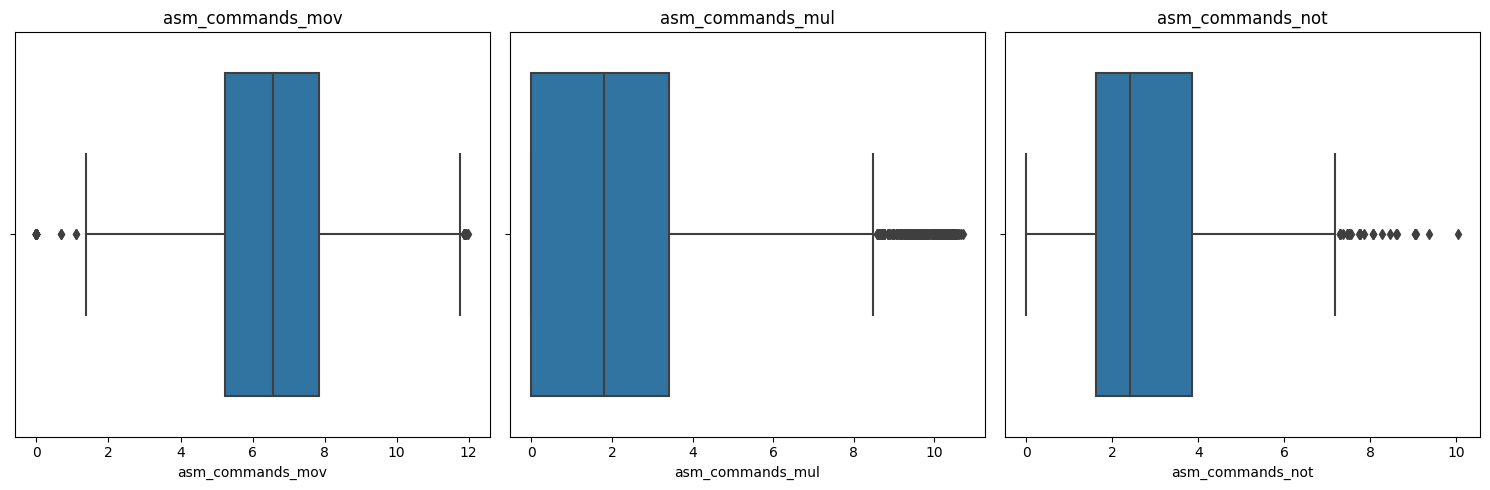

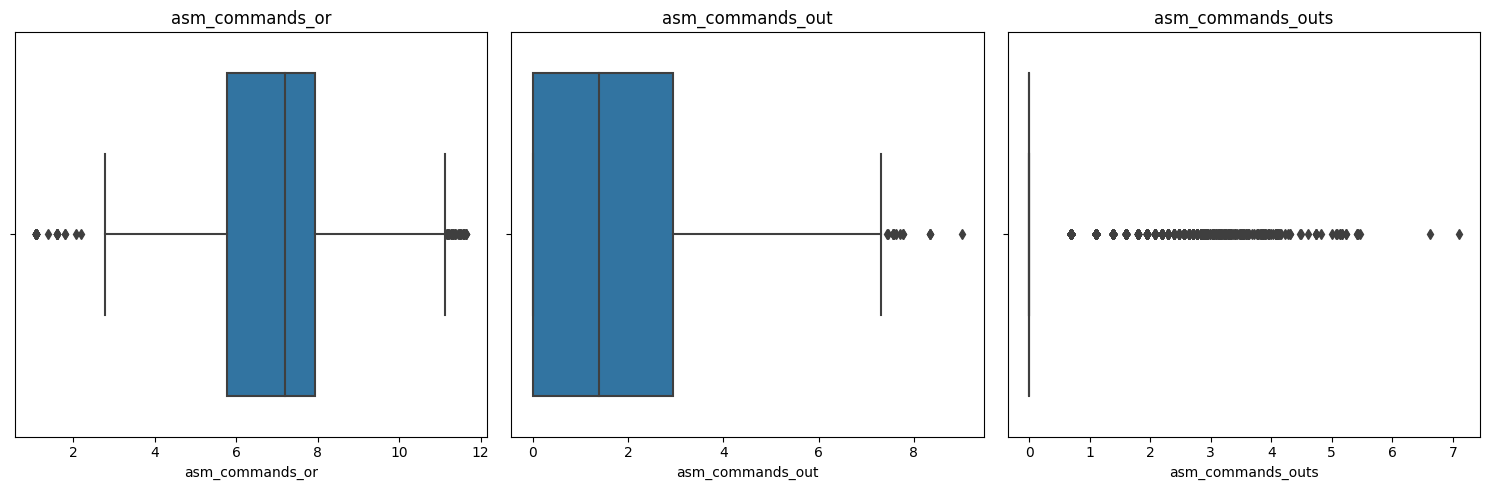

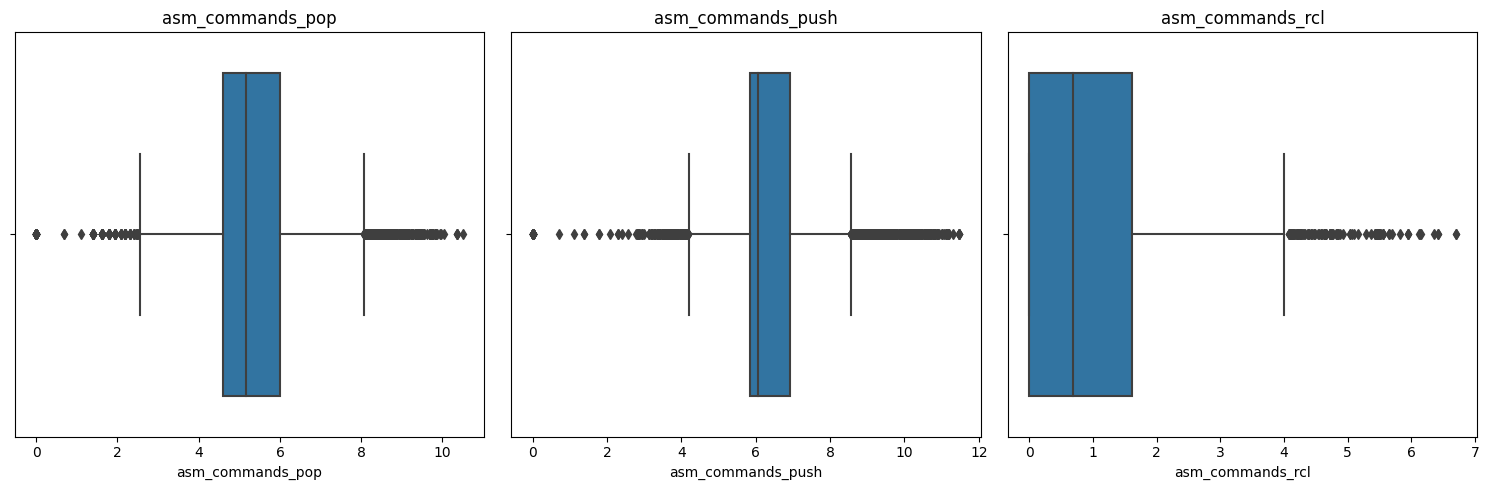

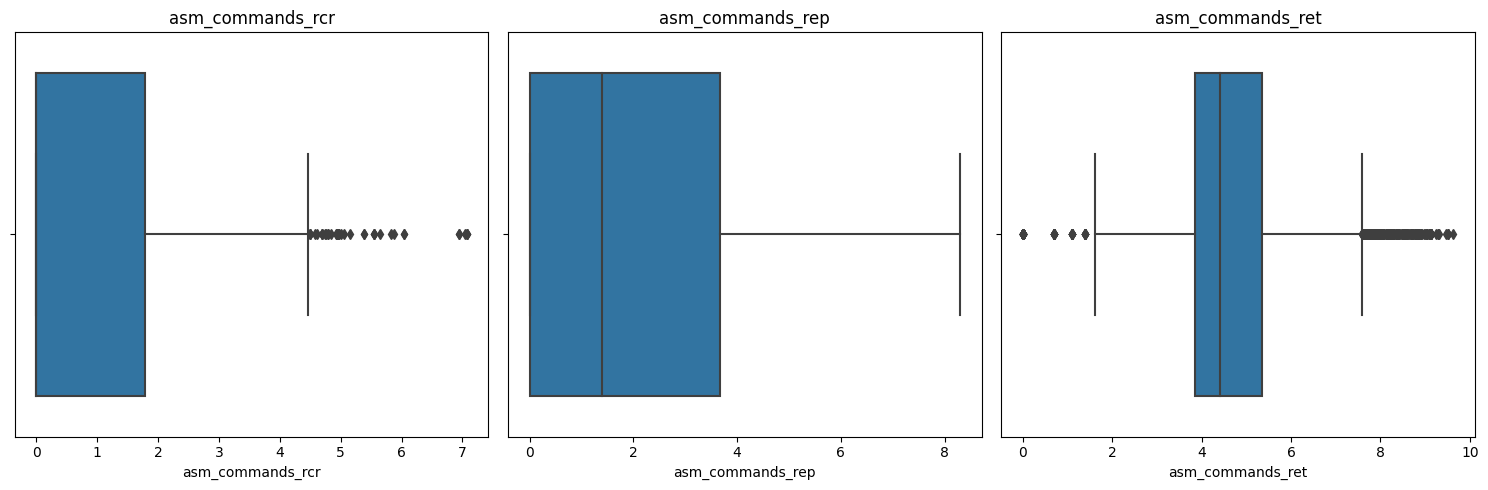

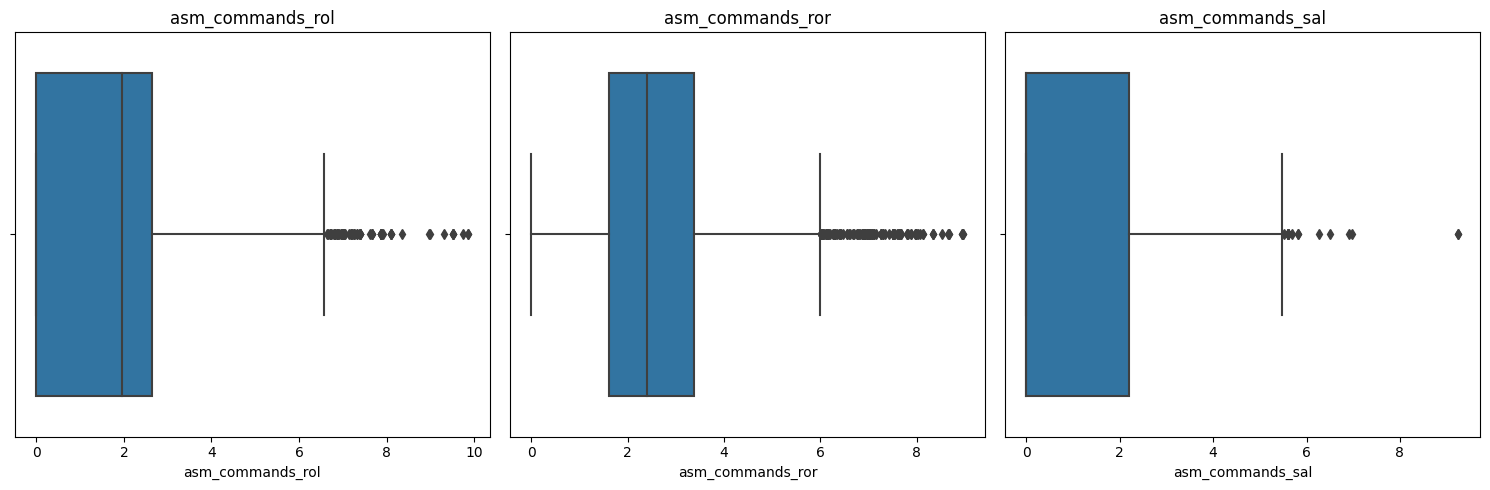

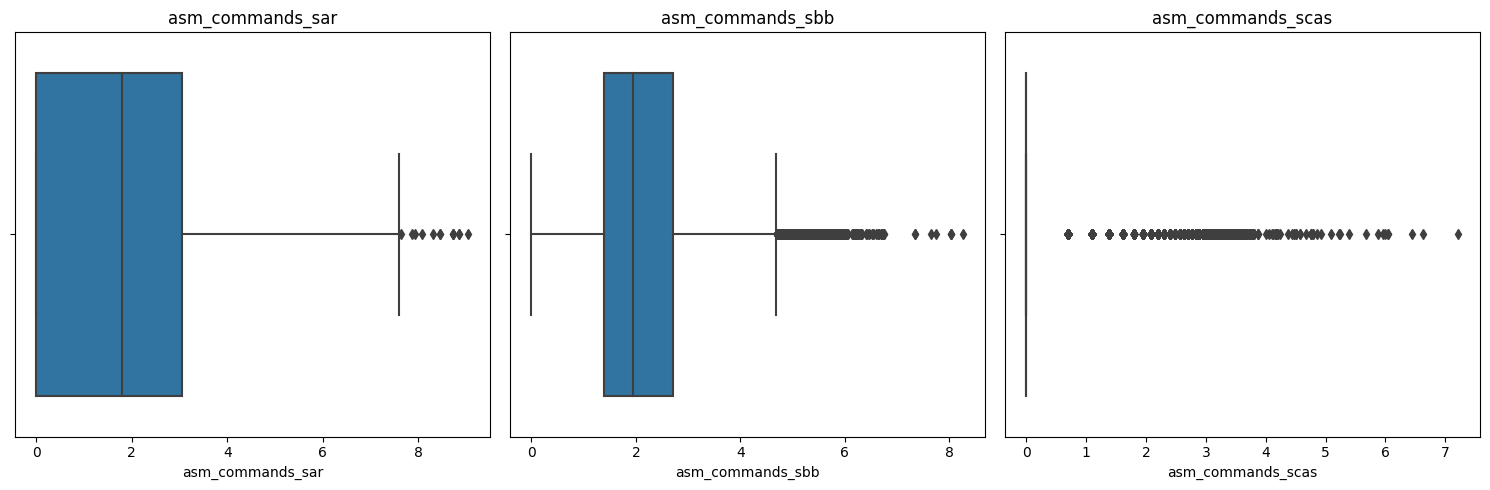

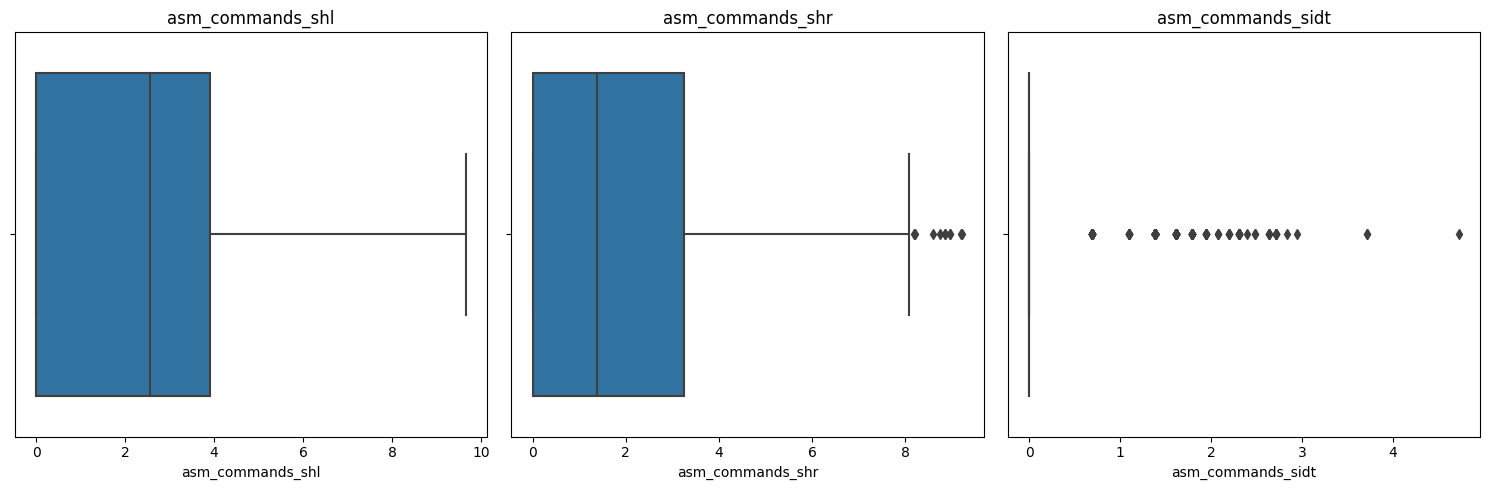

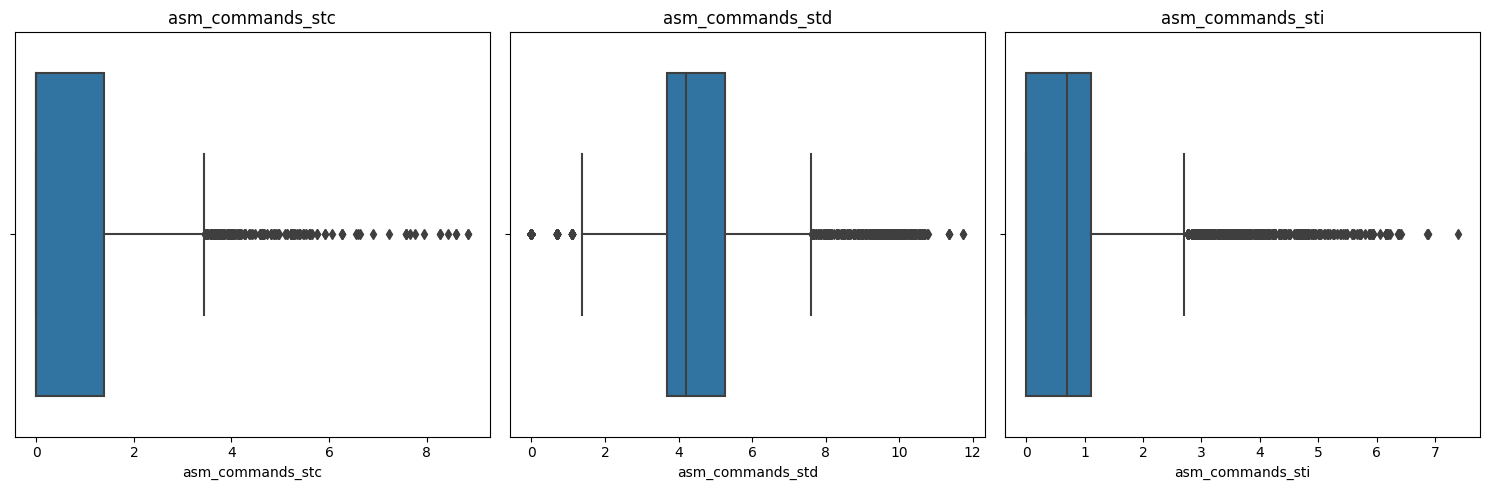

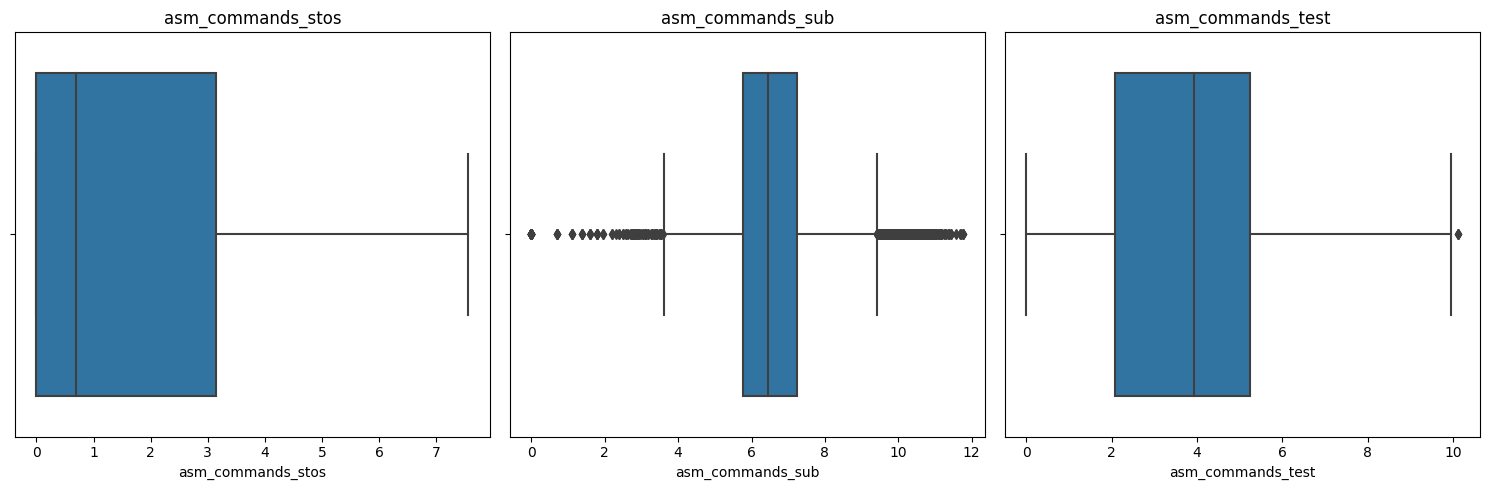

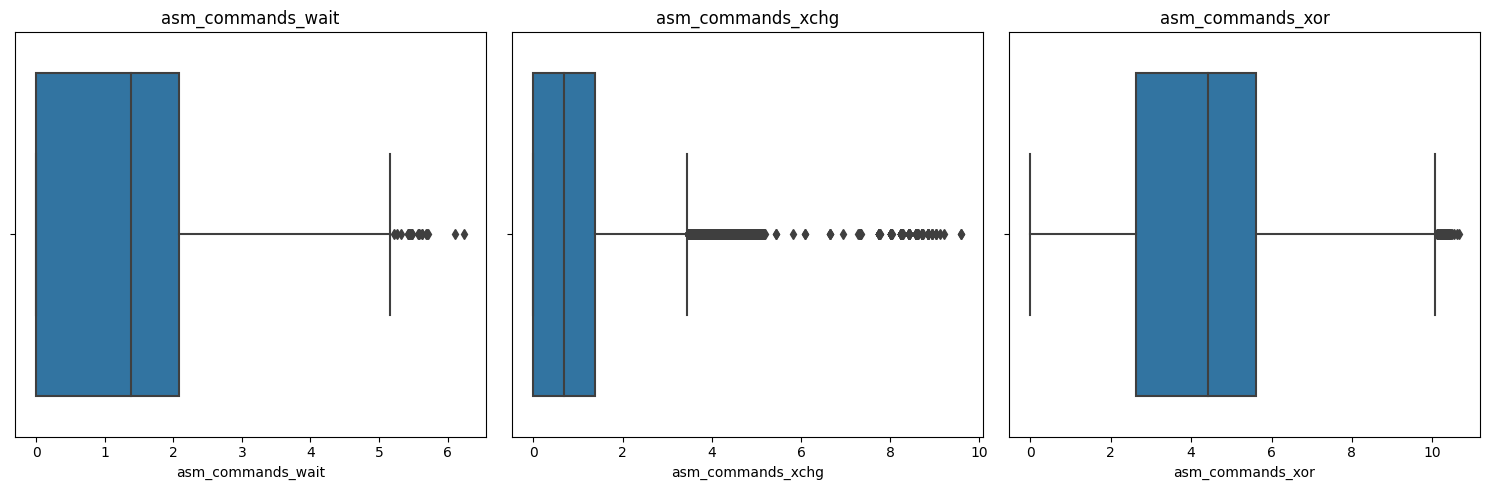

In [12]:
num = 0
for iter in range(22):
  plt.subplots(1, 3, figsize=(15, 5))
  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(data.columns[num])
    sns.boxplot(x= data[data.columns[num]], hue=data['Class'].astype(str))
    num += 1

  plt.tight_layout()
  plt.show()

**Insight:** Yupp! here we can see that outliers can play a pivotal role to detect malware. because these all classes features have different range of outliers.

In [13]:
# spliting the dataset
X, y = data.drop('Class', axis=1), data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# standardize the dataset to easy and fast computation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# encode the malware classes
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [16]:
# Hyperparameter optimization for lightgbm model
def lgb_evaluate(n_estimators, num_leaves, learning_rate, min_child_weight,
                 subsample, colsample_bytree, reg_alpha, reg_lambda):

    params = {
        'n_estimators': int(n_estimators),
        'num_leaves': int(num_leaves),
        'learning_rate': learning_rate,
        'min_child_weight': min_child_weight,
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda,
        'objective': 'multiclass',  # Changed to 'multiclass'
        'num_class': len(np.unique(y_train)), # This parameter is added to inform LGBM about the number of classes.
        'random_state': 42,
        'n_jobs': -1,
        'verbosity': -1
    }

    model = LGBMClassifier(**params)
    cross_val = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='neg_log_loss'))

    return cross_val  # Maximize accuracy

# Search Space
pbounds = {
    'n_estimators': (100, 1000),
    'num_leaves': (20, 200),
    'learning_rate': (0.01, 0.3),
    'min_child_weight': (1, 10),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.5, 1.0),
    'reg_alpha': (0, 10),
    'reg_lambda': (0, 10),
}

# Optimizer
optimizer = BayesianOptimization(
    f=lgb_evaluate,
    pbounds=pbounds,
    random_state=42,
    verbose=2
)

optimizer.maximize(init_points=5, n_iter=25)

print("Best Result:", optimizer.max)

|   iter    |  target   | colsam... | learni... | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------
| 1         | -0.04726  | 0.6873    | 0.2857    | 7.588     | 638.8     | 48.08     | 1.56      | 0.5808    | 0.9331    |
| 2         | -0.04359  | 0.8006    | 0.2153    | 1.185     | 972.9     | 169.8     | 2.123     | 1.818     | 0.5917    |
| 3         | -0.04332  | 0.6521    | 0.1622    | 4.888     | 362.1     | 130.1     | 1.395     | 2.921     | 0.6832    |
| 4         | -0.03816  | 0.728     | 0.2377    | 2.797     | 562.8     | 126.6     | 0.4645    | 6.075     | 0.5853    |
| 5         | -0.04922  | 0.5325    | 0.2852    | 9.691     | 827.6     | 74.83     | 0.9767    | 6.842     | 0.7201    |
| 6         | -0.05094  | 0.9319    | 0.01849   | 4.958     | 559.9     | 129.3     | 2.761     | 4.275     | 0.7423    |
| 7         | -0.06651  

In [17]:
best_params =  {'colsample_bytree': 0.5012980118046253, 'learning_rate': 0.08442389627494576, 'min_child_weight': 1.4630437354922834, 'n_estimators': 370, 'num_leaves': 132, 'reg_alpha': 0.09062720168793614, 'reg_lambda': 1.737436345428861, 'subsample': 0.7652876035668312,  'objective': 'multiclass', 'num_class': len(np.unique(y_train)), 'random_state': 42, 'n_jobs': -1, 'verbosity': -1}

In [18]:
# train best optimized model
lgb_model = LGBMClassifier(**best_params)
lgb_model.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.5012980118046253,
               learning_rate=0.08442389627494576,
               min_child_weight=1.4630437354922834, n_estimators=370, n_jobs=-1,
               num_class=9, num_leaves=132, objective='multiclass',
               random_state=42, reg_alpha=0.09062720168793614,
               reg_lambda=1.737436345428861, subsample=0.7652876035668312,
               verbosity=-1)

In [19]:
# overall report of trained model
print(classification_report(y_test, lgb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       318
           1       1.00      0.99      0.99       490
           2       1.00      1.00      1.00       587
           3       0.97      1.00      0.98        94
           4       1.00      1.00      1.00         6
           5       0.98      0.97      0.98       147
           6       1.00      1.00      1.00        69
           7       0.99      0.96      0.98       252
           8       0.99      0.99      0.99       211

    accuracy                           0.99      2174
   macro avg       0.99      0.99      0.99      2174
weighted avg       0.99      0.99      0.99      2174



# **Thank You!**